In [ ]:
## Notebook env: mirtud_env (R kernel)

In [25]:
library(ggplot2)
library(tidyr)
library(dplyr)
library(stringr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
## load in latent variable results to caluclate silhouette scores on
path = '/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization'
ltv_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_all_batches_ltv10_cellssampled10_maxepoch1000_scMAVE_mu-matrix.tsv.gz')), sep = '\t', row.names = 1)})

names(ltv_list) = list.dirs(path, full.names = F, recursive = F)

## UMAP data processing

In [3]:
## show umap of mave runs
umap_list = list.dirs(path, full.names = F, recursive = F) %>% 
  lapply(function(x) {read.csv(file.path(path, x, paste0(x, '_all_batches_ltv10_cellssampled10_maxepoch1000_UMAP-OF-MU.tsv.gz')), sep = '\t', row.names = 1)})

names(umap_list) = list.dirs(path, full.names = F, recursive = F)

In [4]:
head(umap_list[[1]])

UMAP1    UMAP2    guide                 
tRF_1:TCATGAGGTGTCTTGA-1 4.291605 4.578515 tRNA-Met-CAT-(2)3-1.2t
tRF_3:CCGGTGACACGATTCA-1 9.439110 5.842033 tRF_Trp_CCA_4         
tRF_1:CCGGACAAGGGCATGT-1 5.035045 5.641407 tRNA-Tyr-GTA-2-1.lh   
tRF_1:TCTCAGCCAATGTCTG-1 8.648401 8.357056 tRNA-Arg-ACG-(3)1-1.2t
tRF_3:TATTGGGTCAAGTGGG-1 7.050739 4.634280 tRNA-Thr-CGT-4-1.1t   
tRF_1:GTAAGTCGTGCGTGCT-1 6.623015 8.143276 tRNA-Tyr-GTA-2-1.lh

In [5]:
UMAP_output = umap_list

In [6]:
UMAP_output_2dims = list()
for (j in 1:length(UMAP_output)){
    guides = unique(UMAP_output[[j]]$guide)
    tmp_df = as.data.frame(matrix(0, nrow = nrow(UMAP_output[[j]]), ncol = length(guides)))
    colnames(tmp_df) = guides
    for (i in 1:length(guides)){
        guide_cells = UMAP_output[[j]]$guide == guides[i]
        vec = UMAP_output[[j]]$guide
        vec[guide_cells] = 'Guide'
        vec[!guide_cells] = 'N/A'
        tmp_df[,i] <- vec
    }
    UMAP_output_2dims[[j]] = cbind(UMAP_output[[j]], tmp_df)
}


In [7]:
head(UMAP_output_2dims[[1]])

UMAP1    UMAP2    guide                 
tRF_1:TCATGAGGTGTCTTGA-1 4.291605 4.578515 tRNA-Met-CAT-(2)3-1.2t
tRF_3:CCGGTGACACGATTCA-1 9.439110 5.842033 tRF_Trp_CCA_4         
tRF_1:CCGGACAAGGGCATGT-1 5.035045 5.641407 tRNA-Tyr-GTA-2-1.lh   
tRF_1:TCTCAGCCAATGTCTG-1 8.648401 8.357056 tRNA-Arg-ACG-(3)1-1.2t
tRF_3:TATTGGGTCAAGTGGG-1 7.050739 4.634280 tRNA-Thr-CGT-4-1.1t   
tRF_1:GTAAGTCGTGCGTGCT-1 6.623015 8.143276 tRNA-Tyr-GTA-2-1.lh   
                         tRNA-Met-CAT-(2)3-1.2t tRF_Trp_CCA_4
tRF_1:TCATGAGGTGTCTTGA-1 Guide                  N/A          
tRF_3:CCGGTGACACGATTCA-1 N/A                    Guide        
tRF_1:CCGGACAAGGGCATGT-1 N/A                    N/A          
tRF_1:TCTCAGCCAATGTCTG-1 N/A                    N/A          
tRF_3:TATTGGGTCAAGTGGG-1 N/A                    N/A          
tRF_1:GTAAGTCGTGCGTGCT-1 N/A                    N/A          
                         tRNA-Tyr-GTA-2-1.lh tRNA-Arg-ACG-(3)1-1.2t
tRF_1:TCATGAGGTGTCTTGA-1 N/A                 N/A                   
tRF_3:CCGGTGACACGATTCA-1 N/A                 N/A                   
tRF_1:CCGGACAAGGGCATGT-1 Guide               N/A                   
tRF_1:TCTCAGCCAATGTCTG-1 N/A                 Guide                 
tRF_3:TATTGGGTCAAGTGGG-1 N/A                 N/A                   
tRF_1:GTAAGTCGTGCGTGCT-1 Guide               N/A                   
                         tRNA-Thr-CGT-4-1.1t tRNA-SeC-TCA-1-1.2t
tRF_1:TCATGAGGTGTCTTGA-1 N/A                 N/A                
tRF_3:CCGGTGACACGATTCA-1 N/A                 N/A                
tRF_1:CCGGACAAGGGCATGT-1 N/A                 N/A                
tRF_1:TCTCAGCCAATGTCTG-1 N/A                 N/A                
tRF_3:TATTGGGTCAAGTGGG-1 Guide               N/A                
tRF_1:GTAAGTCGTGCGTGCT-1 N/A                 N/A                
                         tRNA-His-GTG-(9)1-1.2t ⋯ tRF_Gln_CTG_2
tRF_1:TCATGAGGTGTCTTGA-1 N/A                    ⋯ N/A          
tRF_3:CCGGTGACACGATTCA-1 N/A                    ⋯ N/A          
tRF_1:CCGGACAAGGGCATGT-1 N/A                    ⋯ N/A          
tRF_1:TCTCAGCCAATGTCTG-1 N/A                    ⋯ N/A          
tRF_3:TATTGGGTCAAGTGGG-1 N/A                    ⋯ N/A          
tRF_1:GTAAGTCGTGCGTGCT-1 N/A                    ⋯ N/A          
                         tRNA-Leu-TAA-3-1.2t tRNA-Arg-TCT-(2)3-1.2t
tRF_1:TCATGAGGTGTCTTGA-1 N/A                 N/A                   
tRF_3:CCGGTGACACGATTCA-1 N/A                 N/A                   
tRF_1:CCGGACAAGGGCATGT-1 N/A                 N/A                   
tRF_1:TCTCAGCCAATGTCTG-1 N/A                 N/A                   
tRF_3:TATTGGGTCAAGTGGG-1 N/A                 N/A                   
tRF_1:GTAAGTCGTGCGTGCT-1 N/A                 N/A                   
                         tRF_Ser_GCT_2 tRNA-Arg-CCT-4-1.3t
tRF_1:TCATGAGGTGTCTTGA-1 N/A           N/A                
tRF_3:CCGGTGACACGATTCA-1 N/A           N/A                
tRF_1:CCGGACAAGGGCATGT-1 N/A           N/A                
tRF_1:TCTCAGCCAATGTCTG-1 N/A           N/A                
tRF_3:TATTGGGTCAAGTGGG-1 N/A           N/A                
tRF_1:GTAAGTCGTGCGTGCT-1 N/A           N/A                
                         tRNA-Gly-CCC-(2)2-1.2t tRF_Ser_TGA.CGA_2
tRF_1:TCATGAGGTGTCTTGA-1 N/A                    N/A              
tRF_3:CCGGTGACACGATTCA-1 N/A                    N/A              
tRF_1:CCGGACAAGGGCATGT-1 N/A                    N/A              
tRF_1:TCTCAGCCAATGTCTG-1 N/A                    N/A              
tRF_3:TATTGGGTCAAGTGGG-1 N/A                    N/A              
tRF_1:GTAAGTCGTGCGTGCT-1 N/A                    N/A              
                         tRNA-Lys-CTT-11-1.2t tRF_Phe_GAA_2
tRF_1:TCATGAGGTGTCTTGA-1 N/A                  N/A          
tRF_3:CCGGTGACACGATTCA-1 N/A                  N/A          
tRF_1:CCGGACAAGGGCATGT-1 N/A                  N/A          
tRF_1:TCTCAGCCAATGTCTG-1 N/A                  N/A          
tRF_3:TATTGGGTCAAGTGGG-1 N/A                  N/A          
tRF_1:GTAAGTCGTGCGTGCT-1 N/A           

In [8]:
plts2 <- list()
for (j in 1:length(UMAP_output_2dims)){
    plts2[[j]] <- list()
    for (i in 1:length(guides)){
        tmp <- UMAP_output_2dims[[j]][,c(1,2,(i+3))]
        colnames(tmp)[3] <- 'Type'
        tmp <- tmp[order(tmp$Type, decreasing = TRUE),]
        if (str_sub(guides[i], start = 1, end = 6) == 'TuD_NC'){
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('#39568CFF', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        } else {
            plts2[[j]][[i]] <- ggplot(tmp, aes(UMAP1, UMAP2, color = Type)) + geom_point(size = 0.5) + 
            theme_classic() + scale_color_manual(values = c('red', 'gray95')) + theme(legend.position = 'none', plot.title = element_text(hjust = 0.5)) +
            ggtitle(guides[i]) + xlab('UMAP1') + ylab('UMAP2')
        }
    }
}

In [9]:
library(ggpubr)
umap_plts <- list()
for (j in 1:length(plts2)){
    umap_plts[[j]] <- rep(list('empty'), ceiling(length(plts2[[j]])/25))
    for (i in 1:ceiling(length(plts2[[j]])/25)){
        umap_plts[[j]][[i]] <- ggarrange(plotlist = plts2[[j]][(25*(i-1)+1):(25*i)], ncol = 5, nrow = 5, legend = 'none')
    }
}


## UMAPS

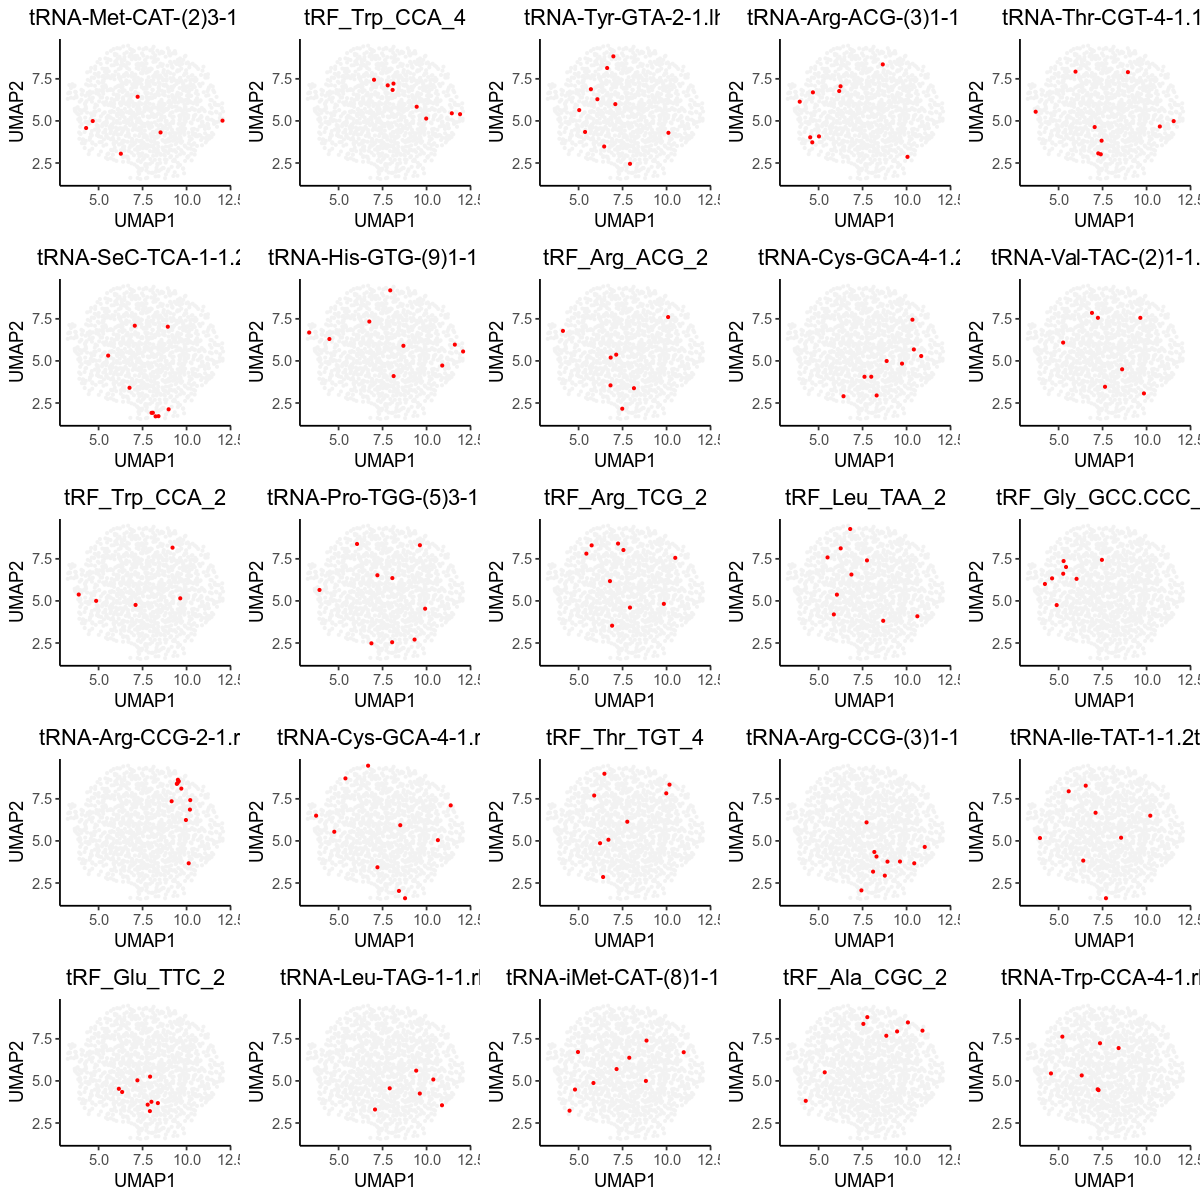

In [10]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plts[[1]][[1]]

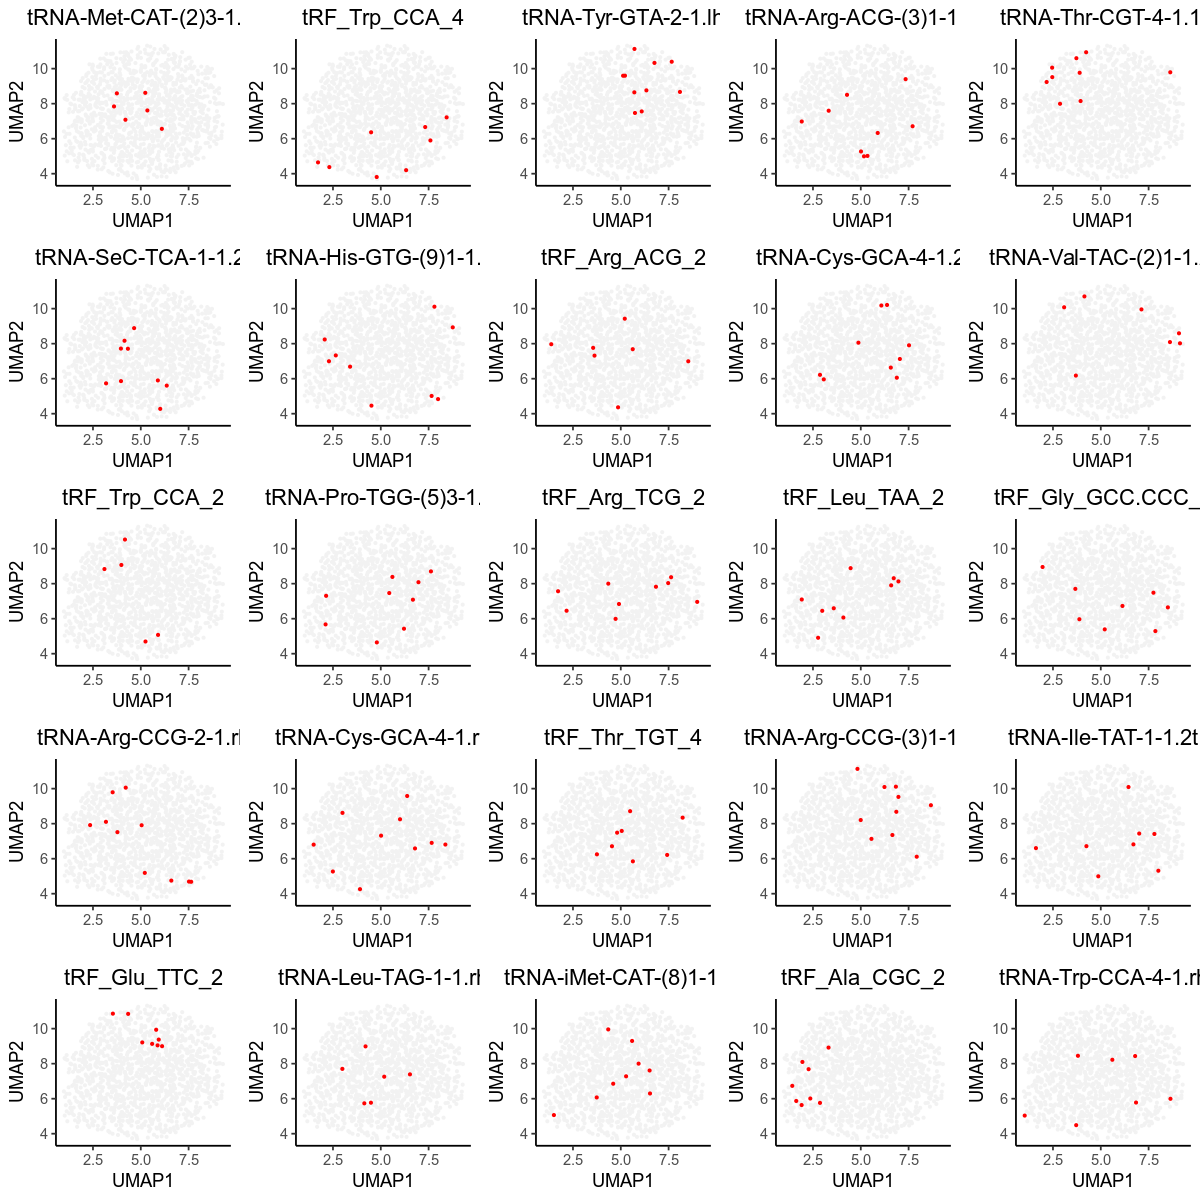

In [11]:
umap_plts[[2]][[1]]

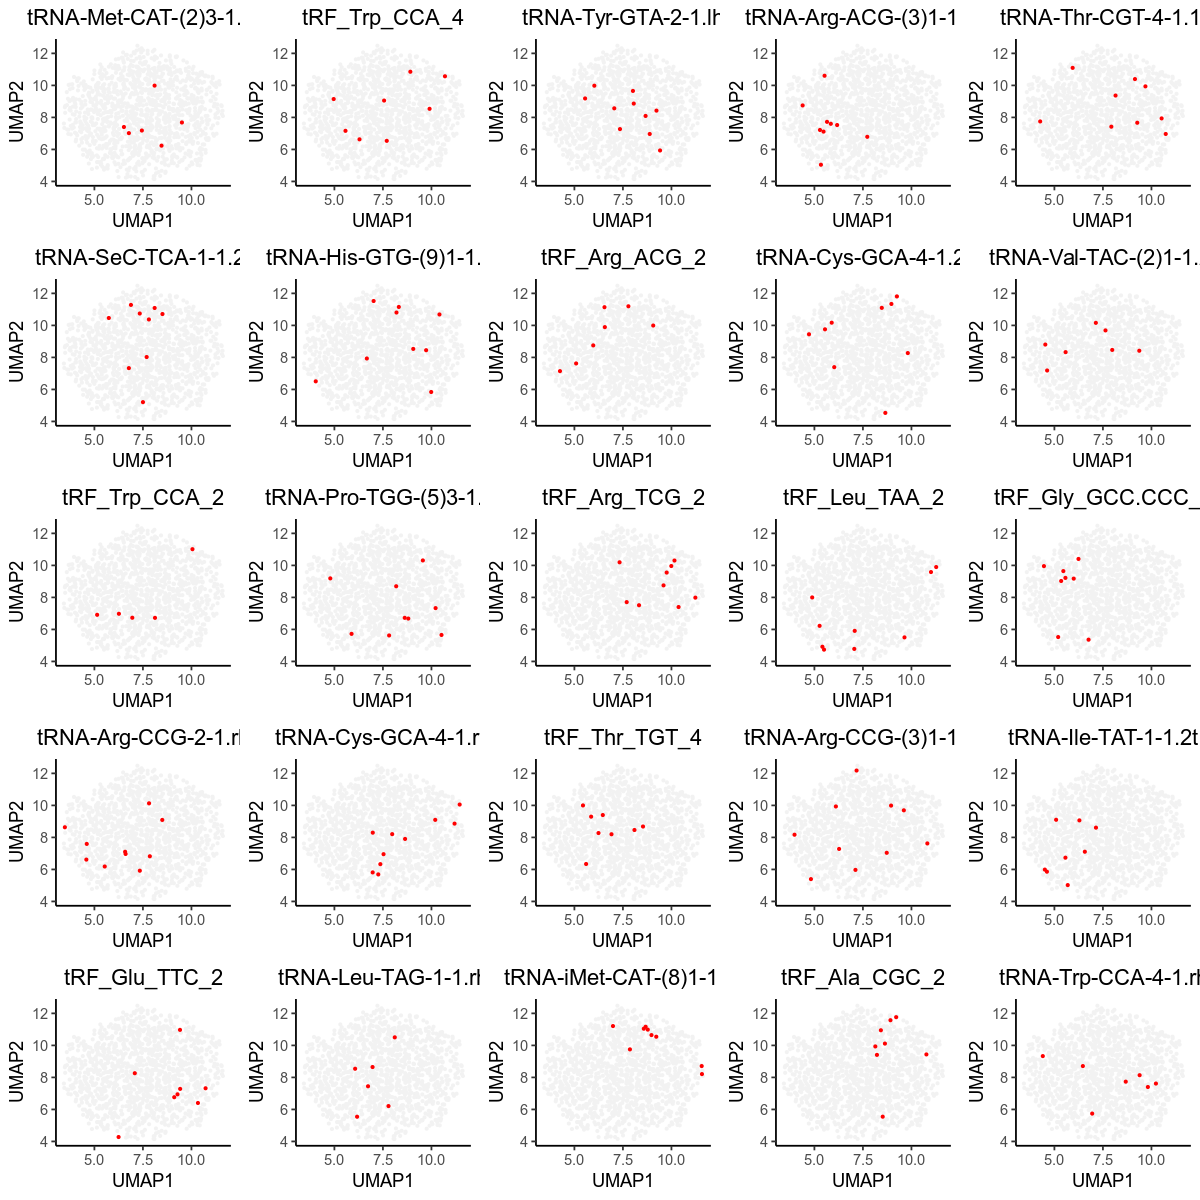

In [12]:
umap_plts[[3]][[1]]

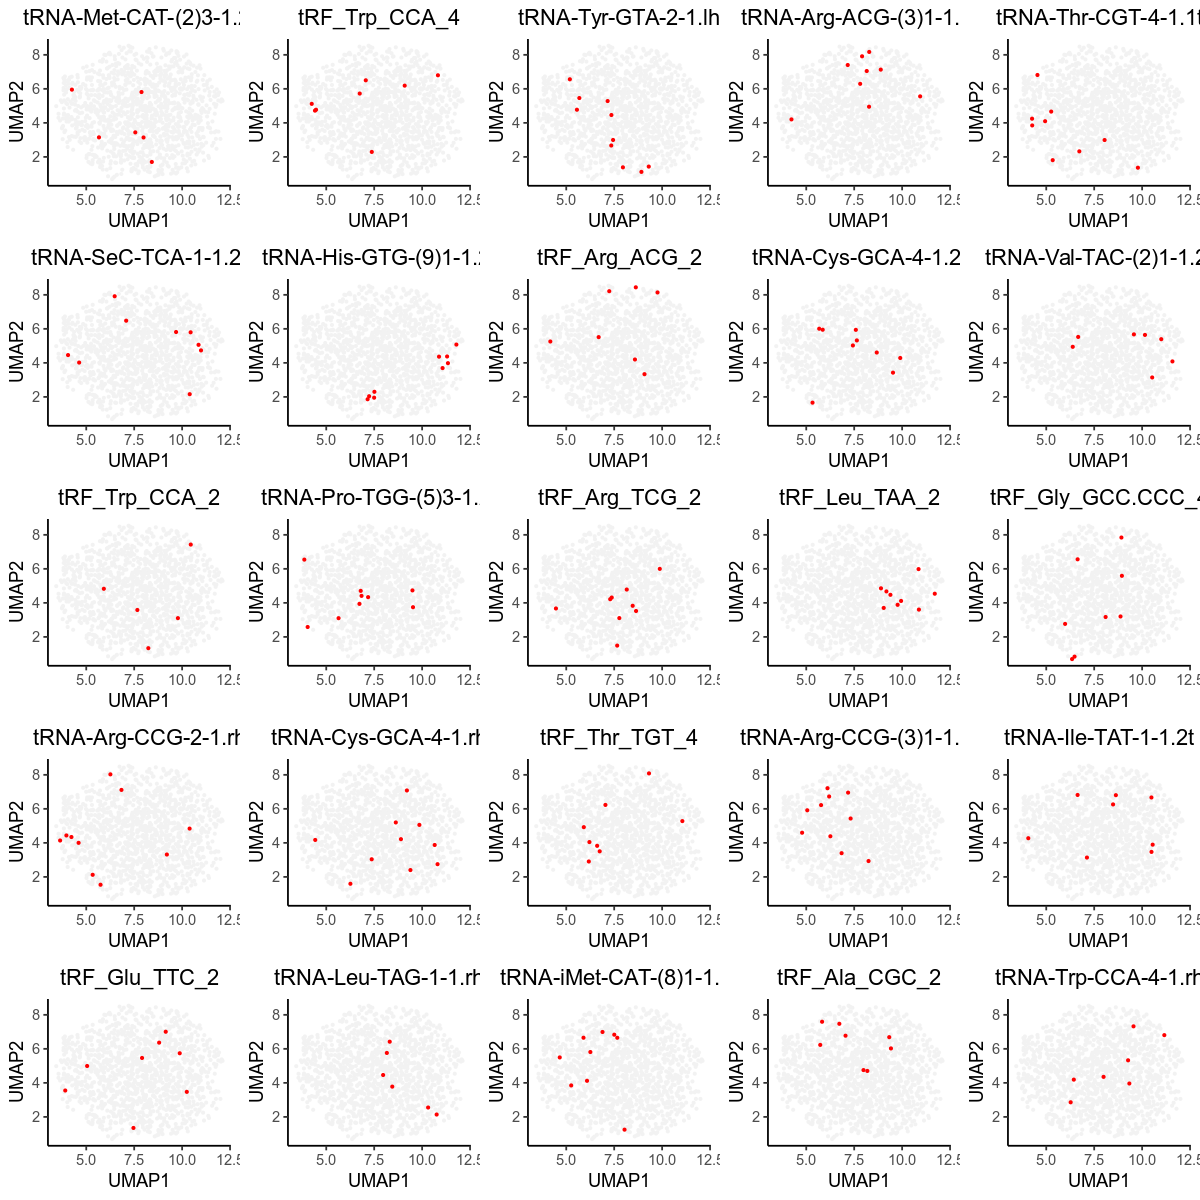

In [13]:
umap_plts[[4]][[1]]

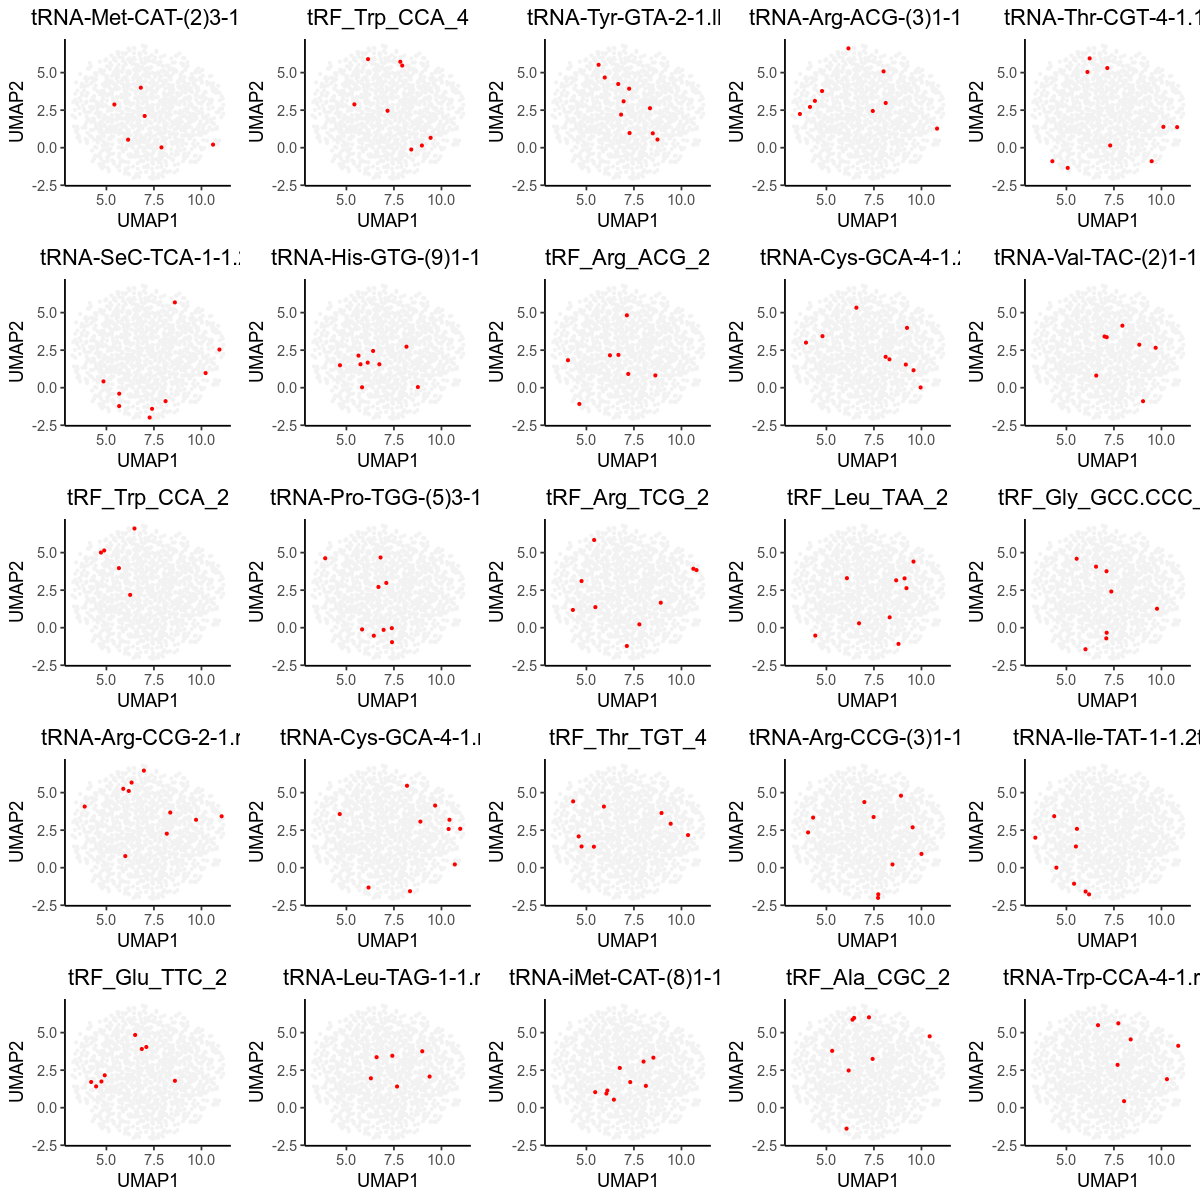

In [14]:
umap_plts[[5]][[1]]

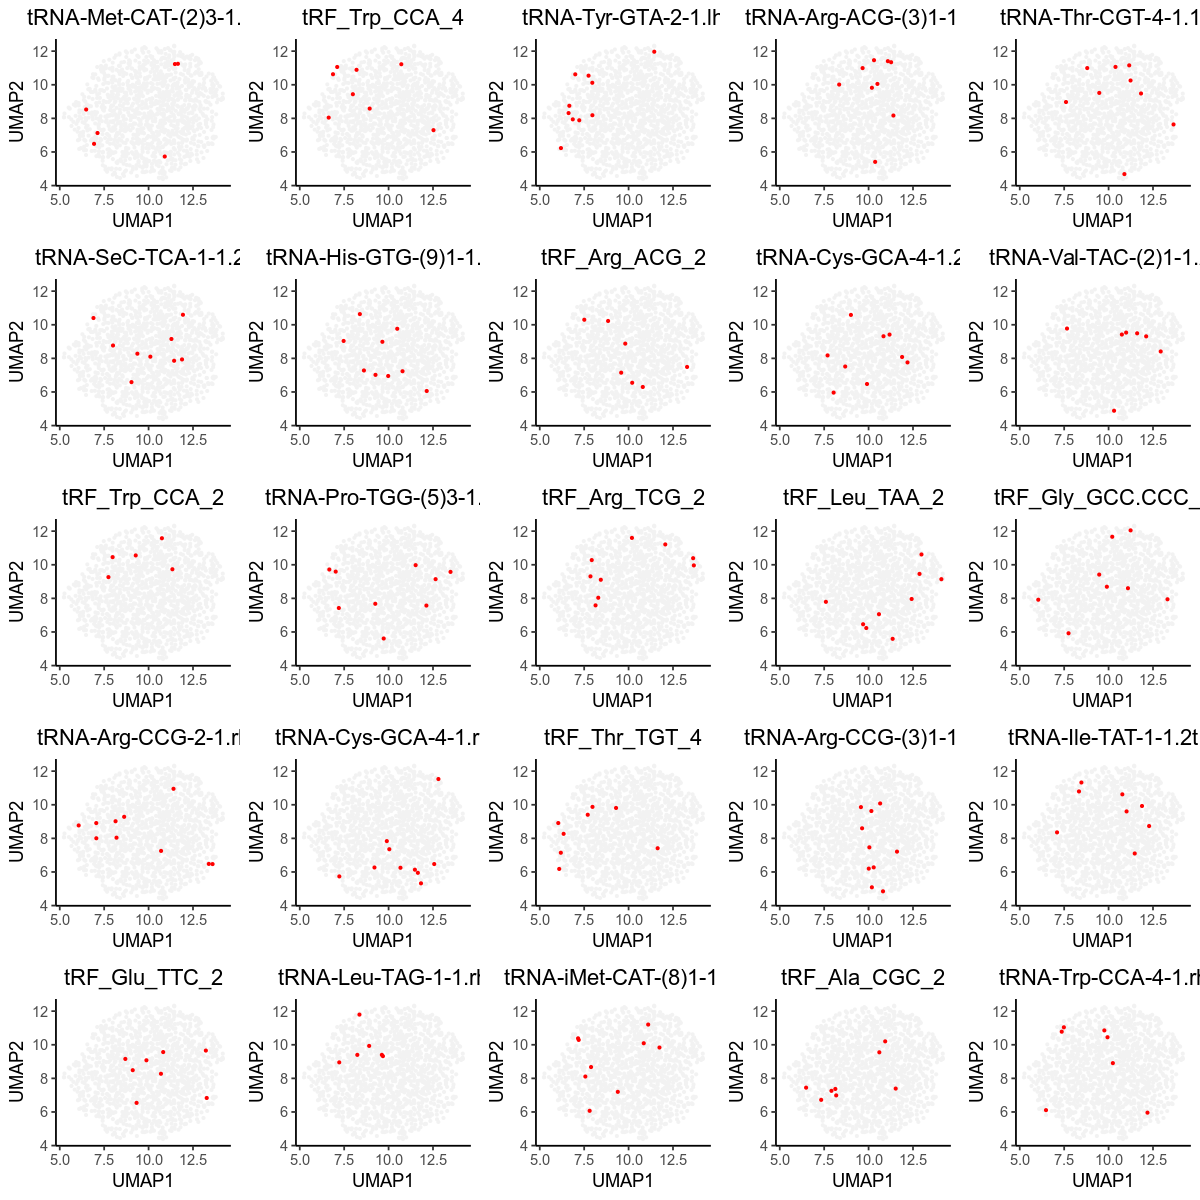

In [15]:
umap_plts[[6]][[1]]

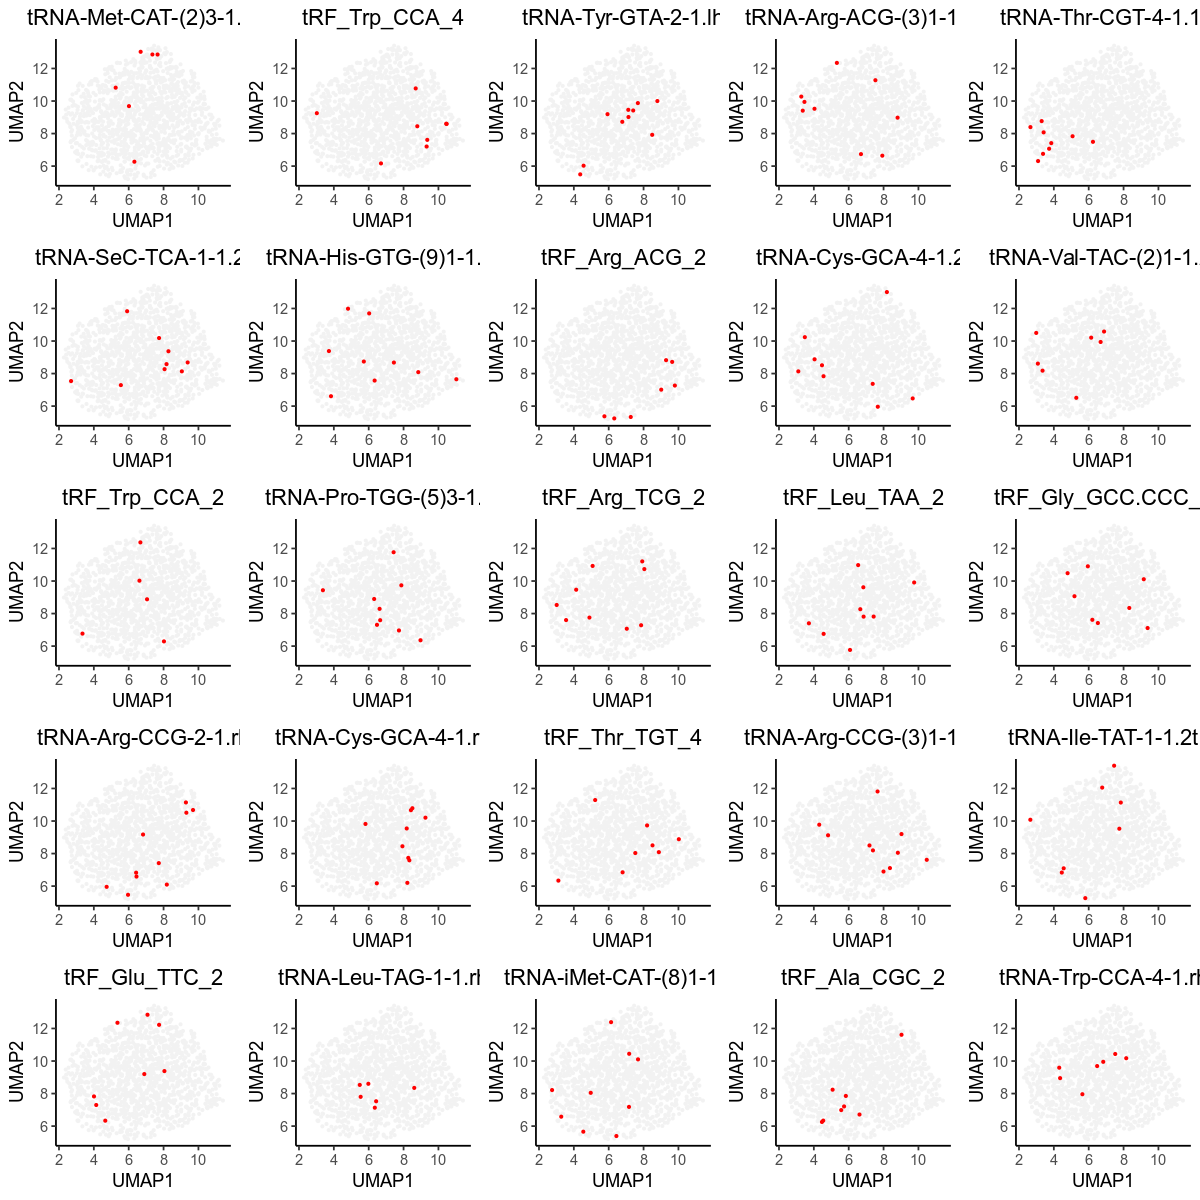

In [16]:
umap_plts[[7]][[1]]

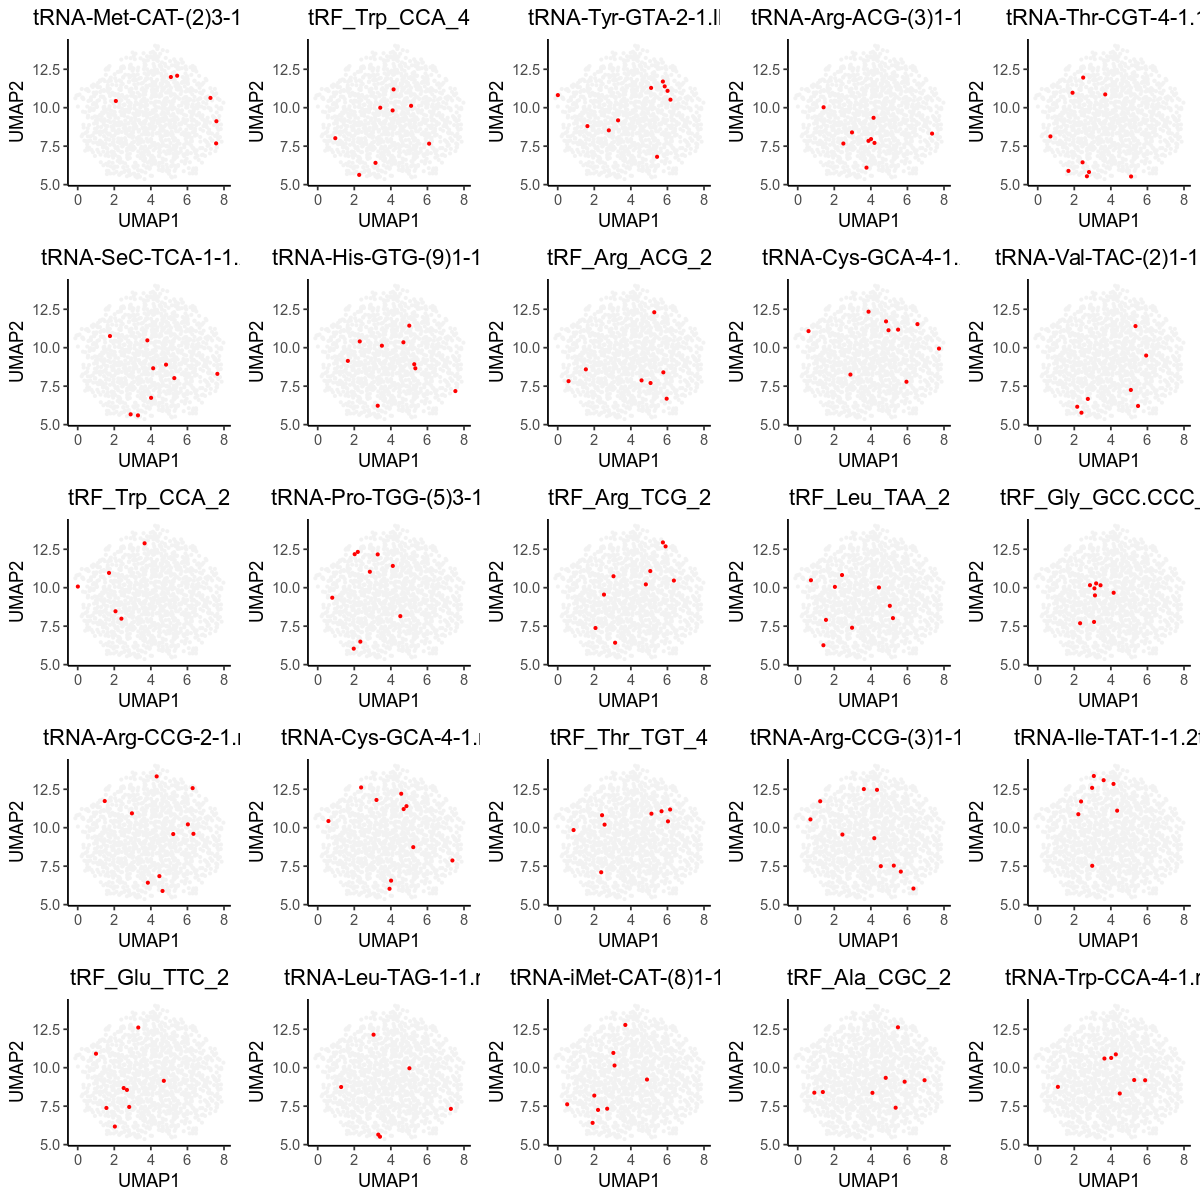

In [17]:
umap_plts[[8]][[1]]

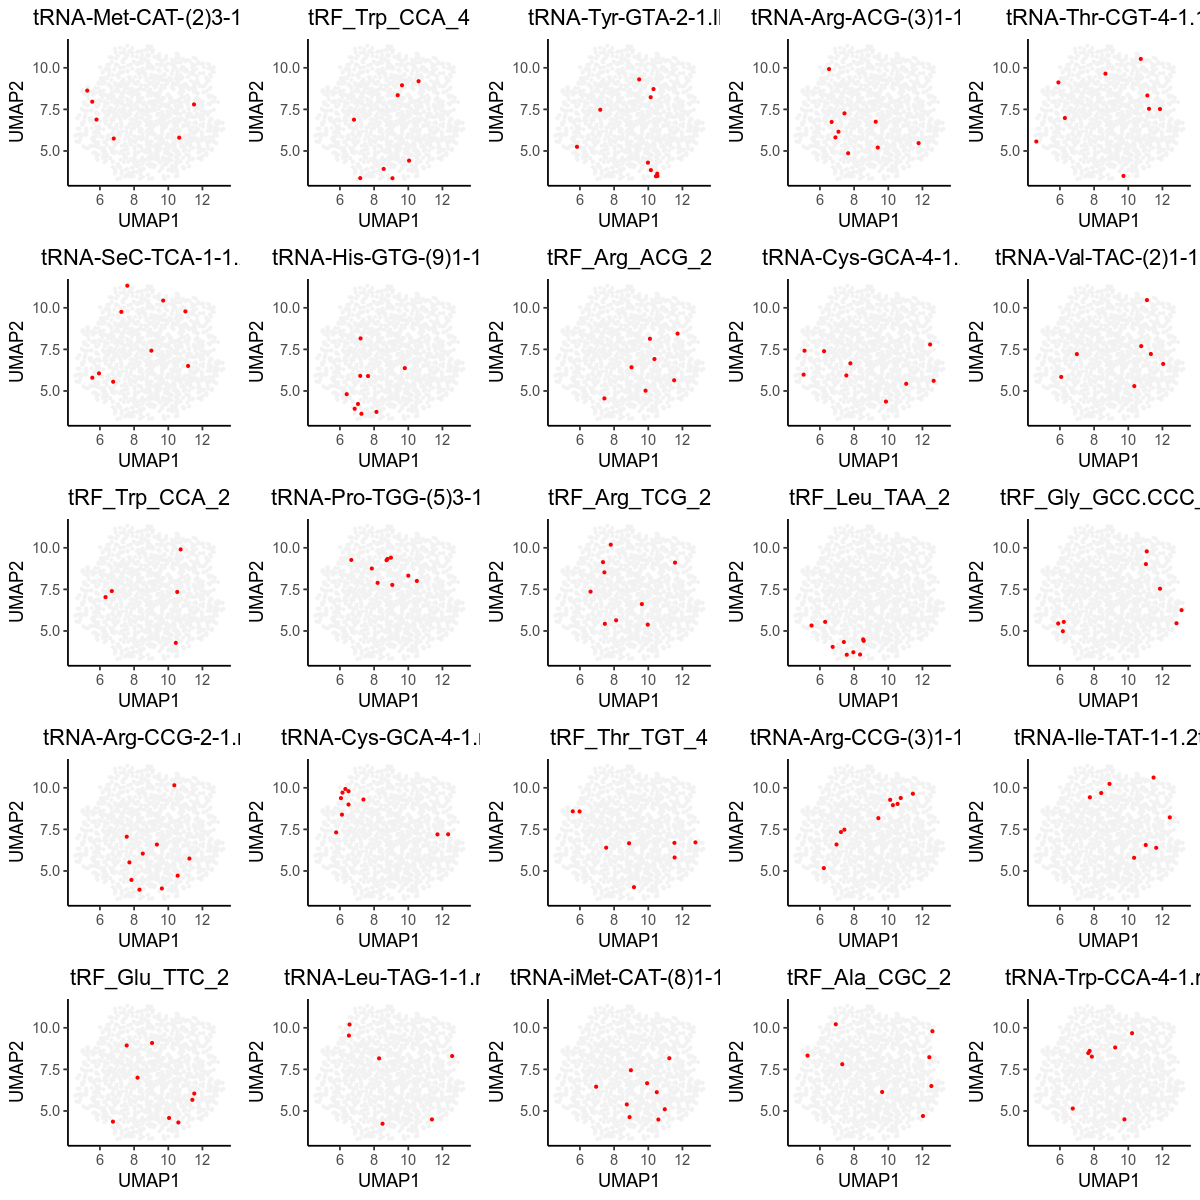

In [19]:
umap_plts[[9]][[1]]

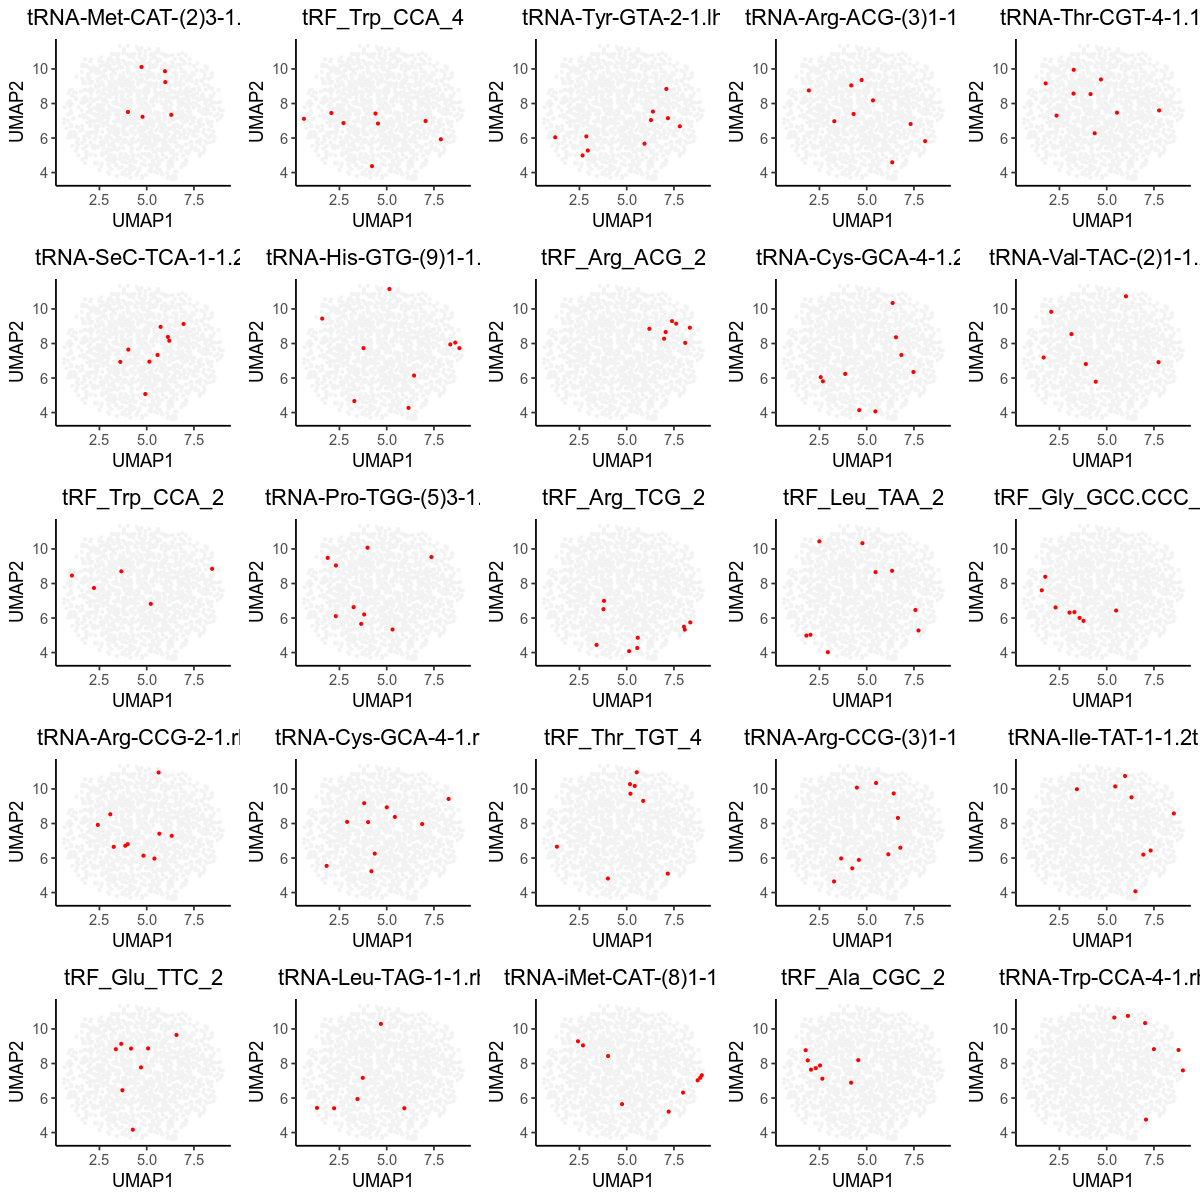

In [20]:
umap_plts[[10]][[1]]

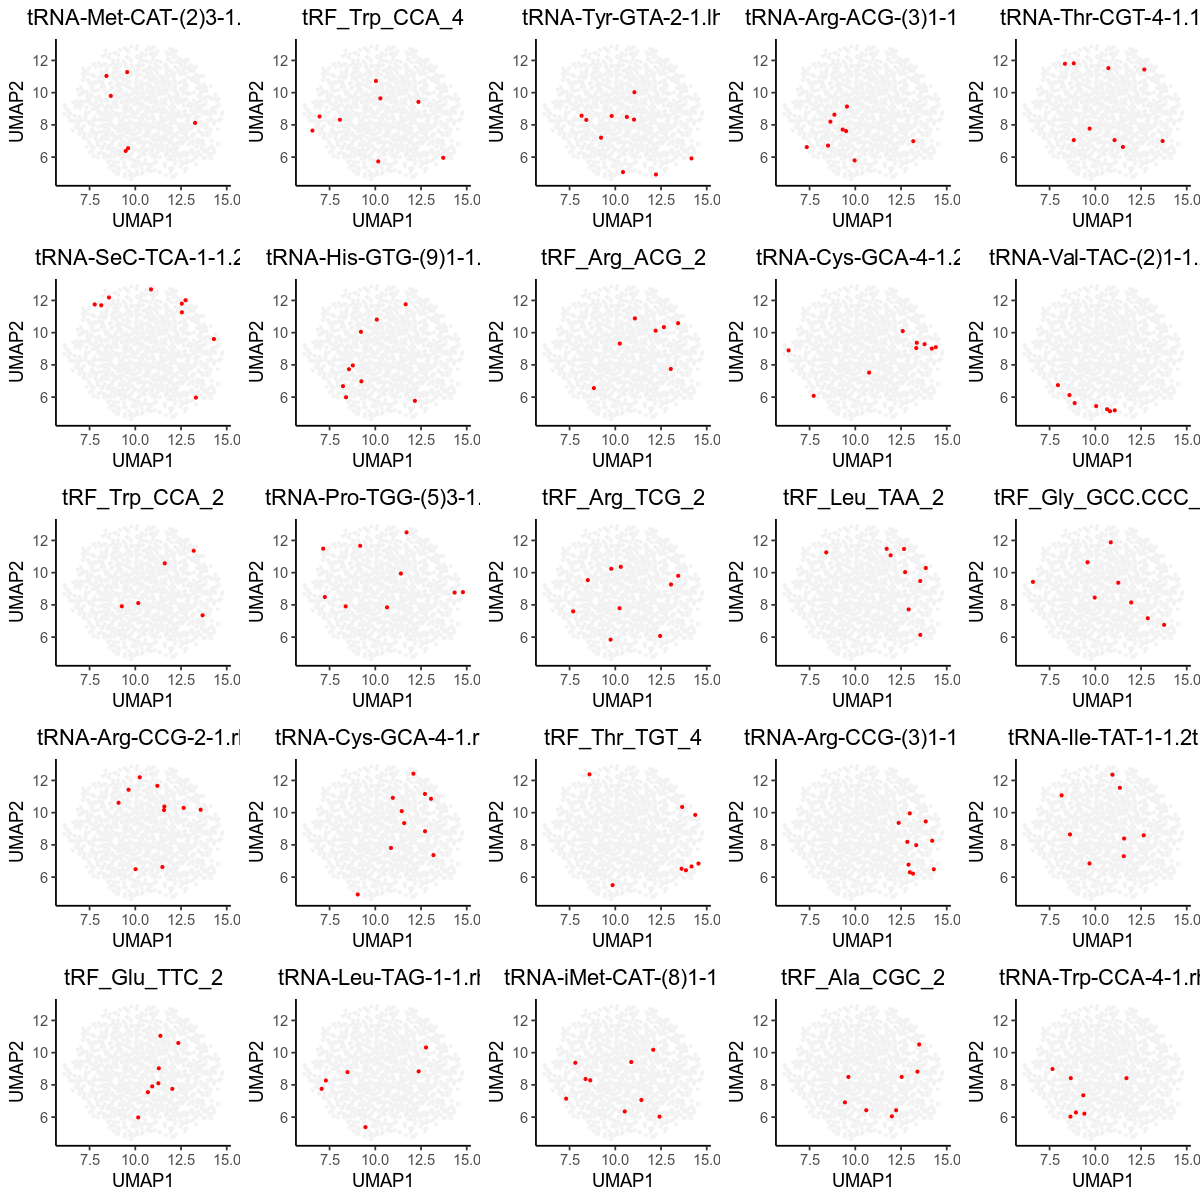

In [21]:
umap_plts[[11]][[1]]

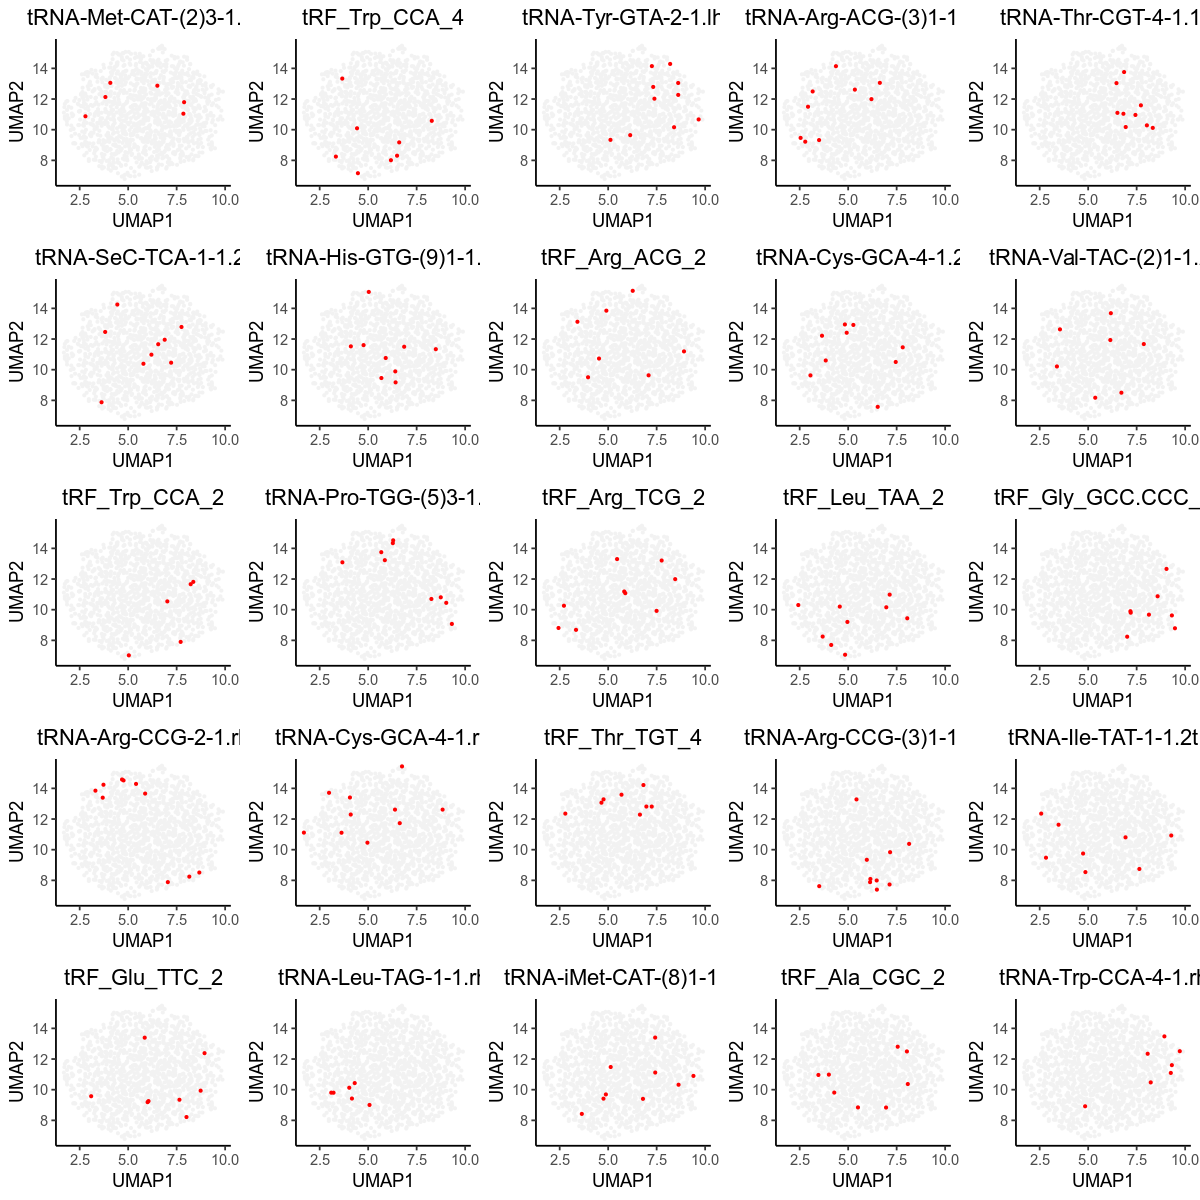

In [22]:
umap_plts[[12]][[1]]

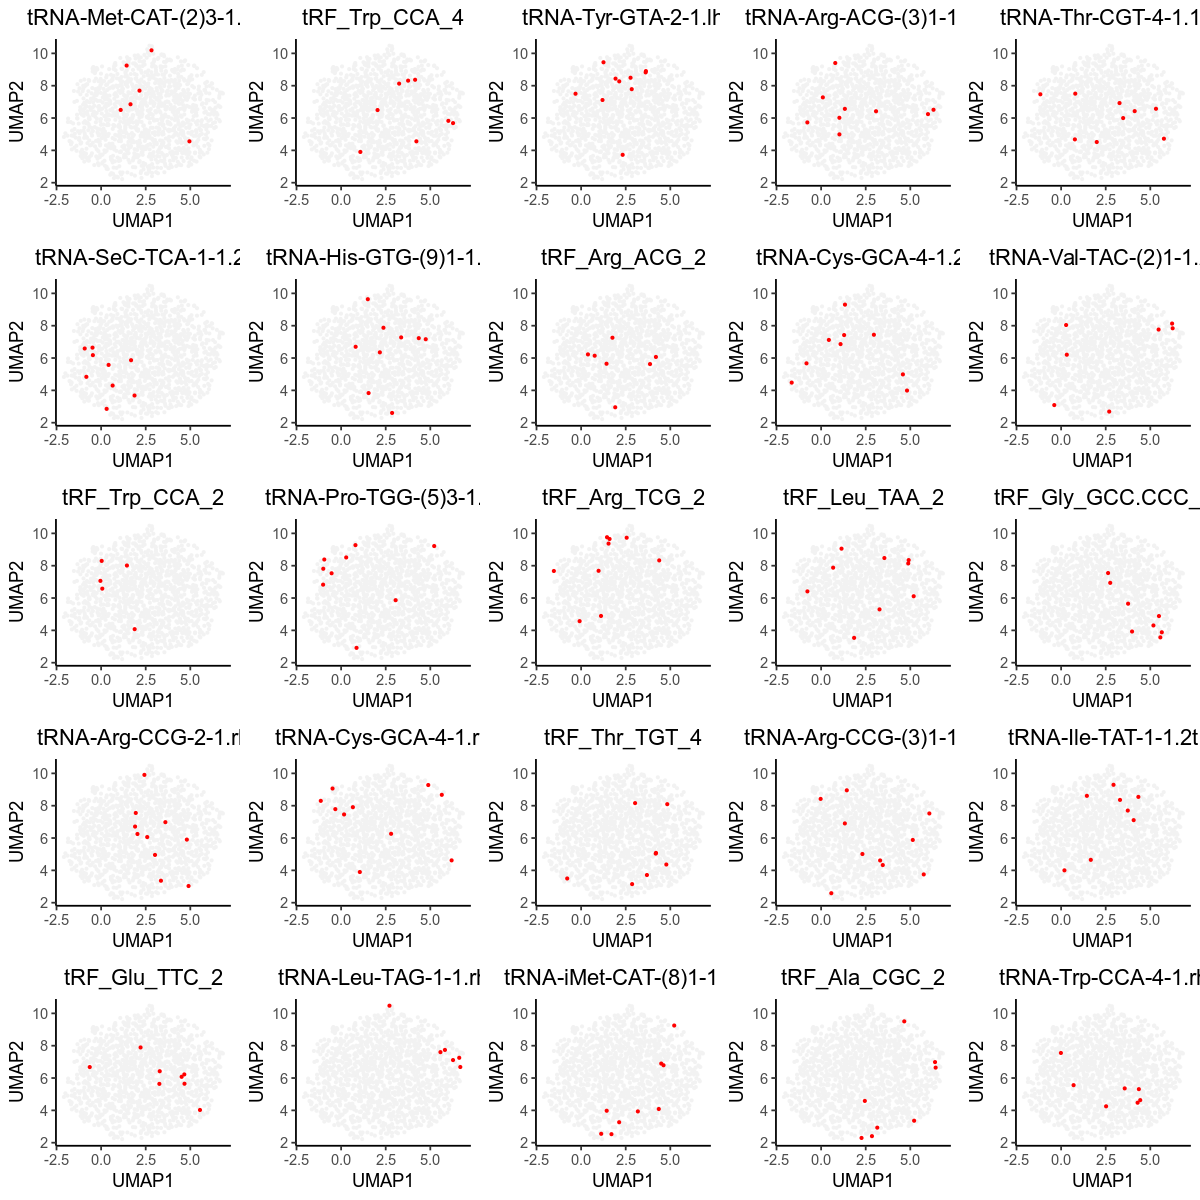

In [23]:
umap_plts[[13]][[1]]

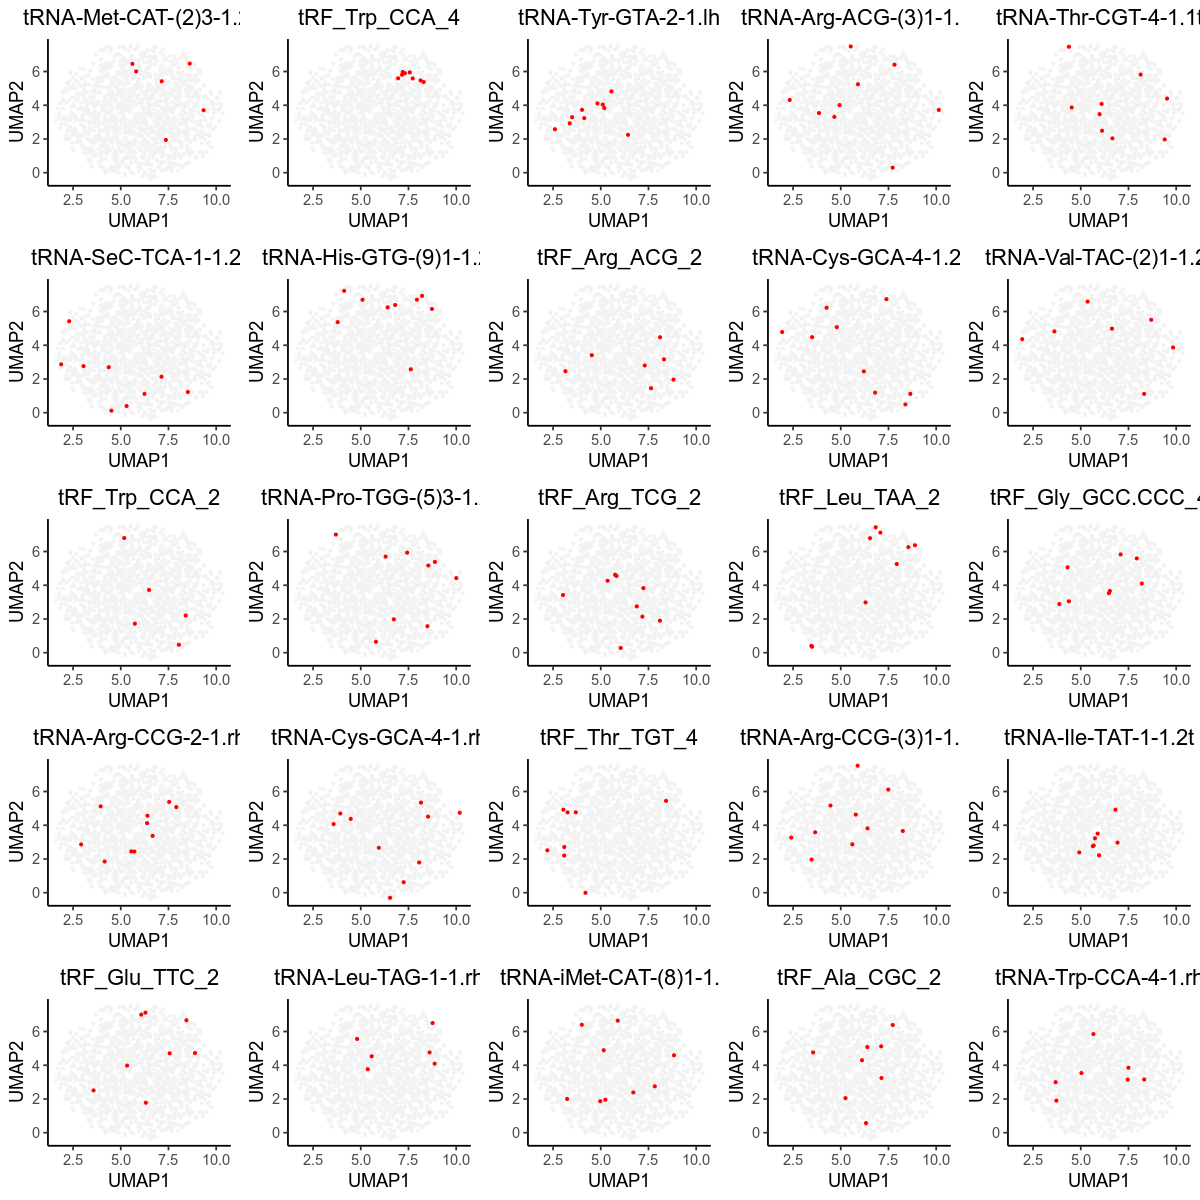

In [24]:
umap_plts[[14]][[1]]

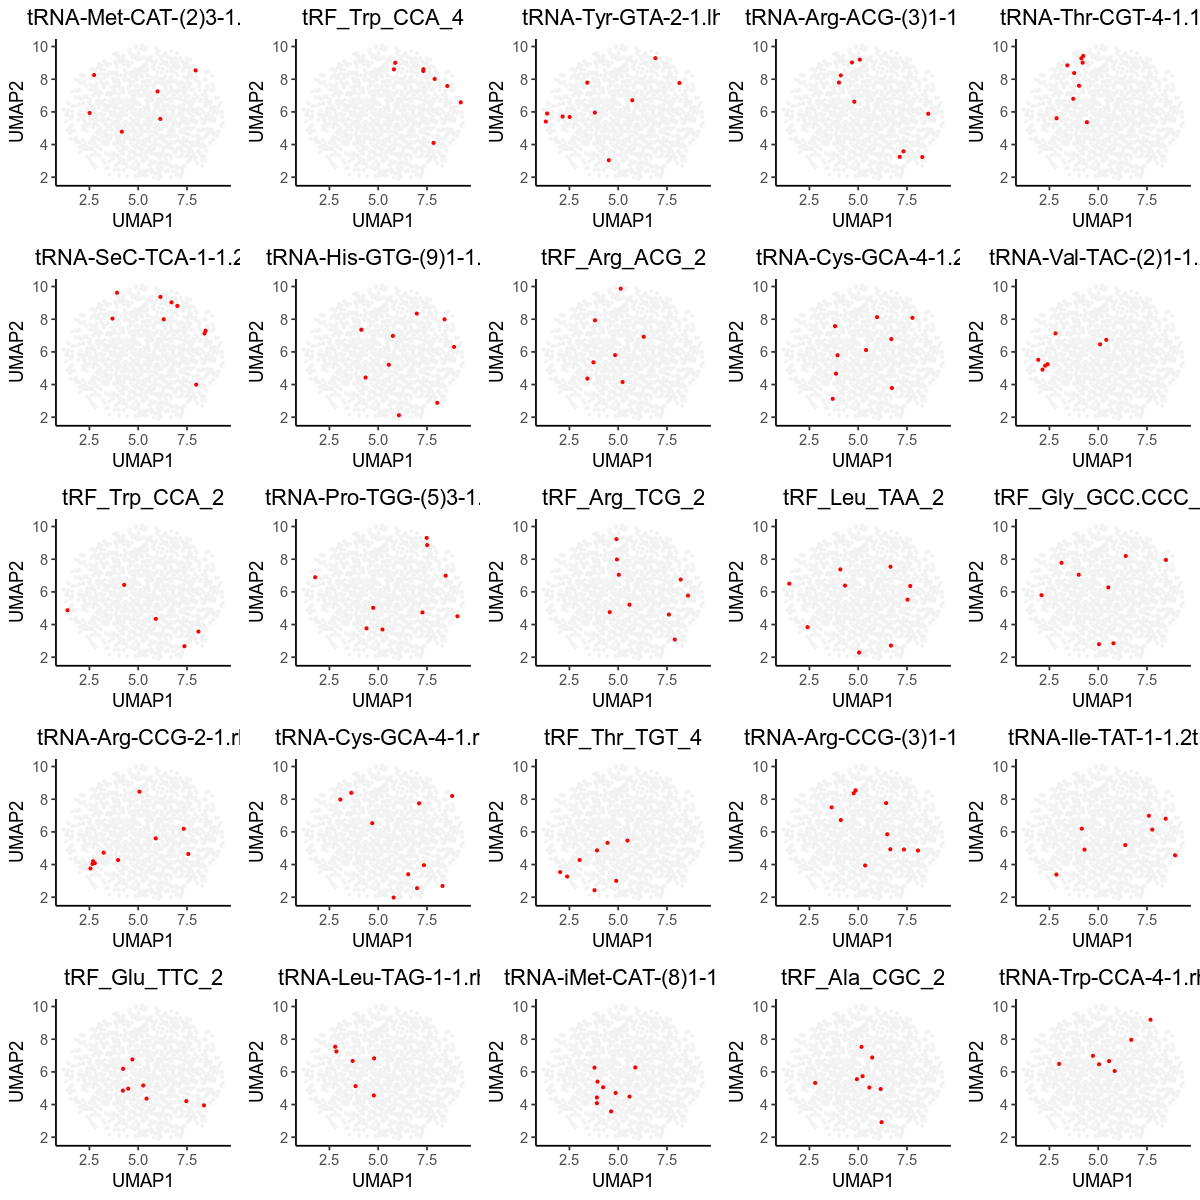

In [25]:
umap_plts[[15]][[1]]

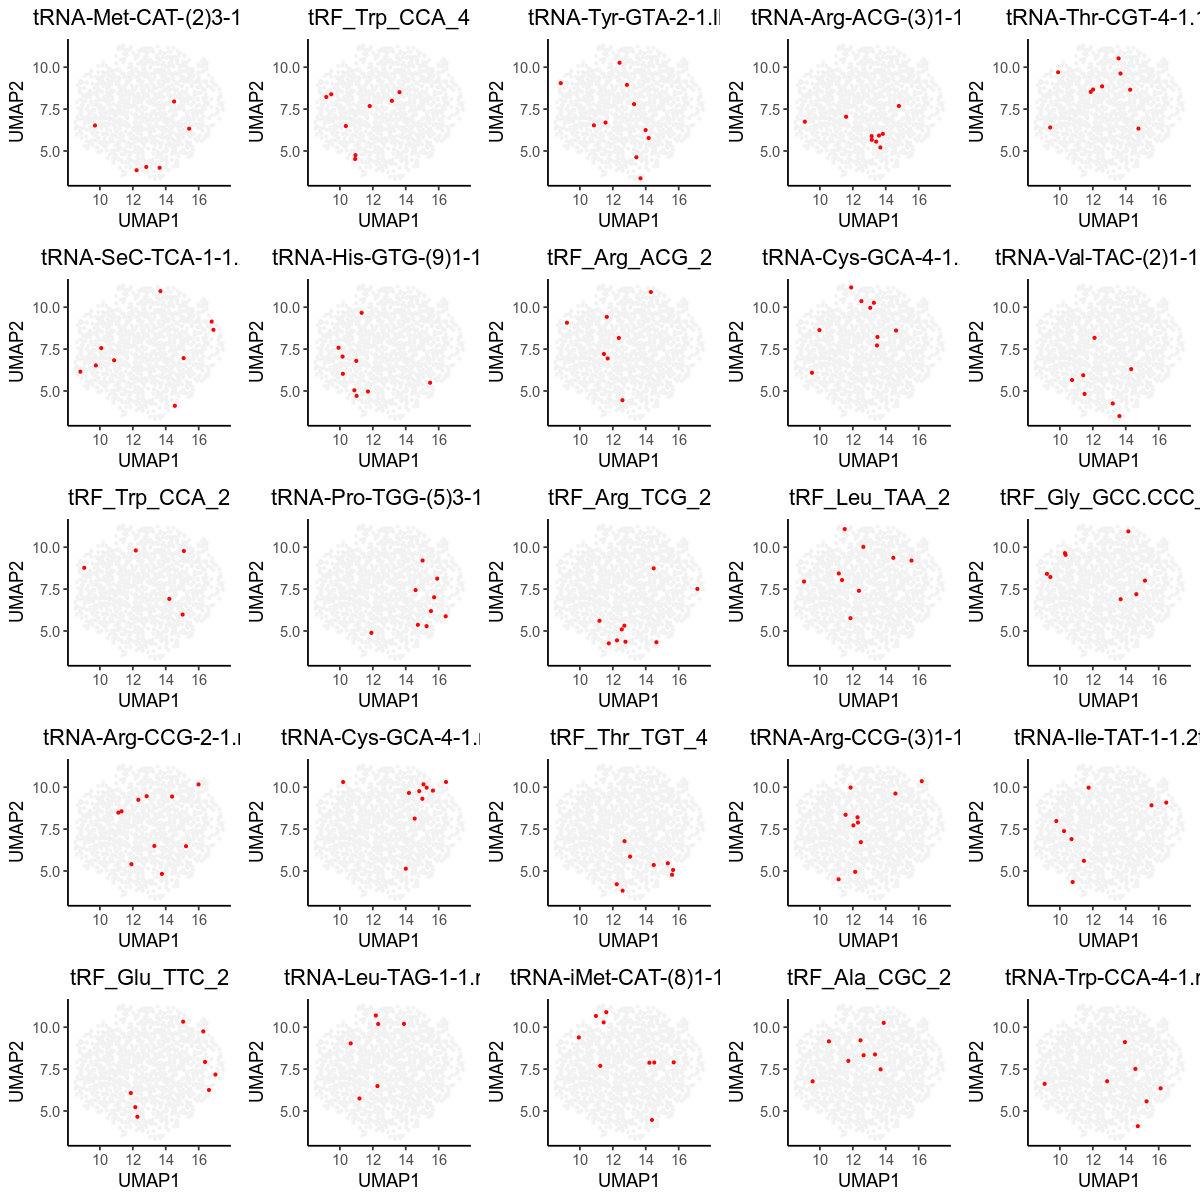

In [26]:
umap_plts[[16]][[1]]

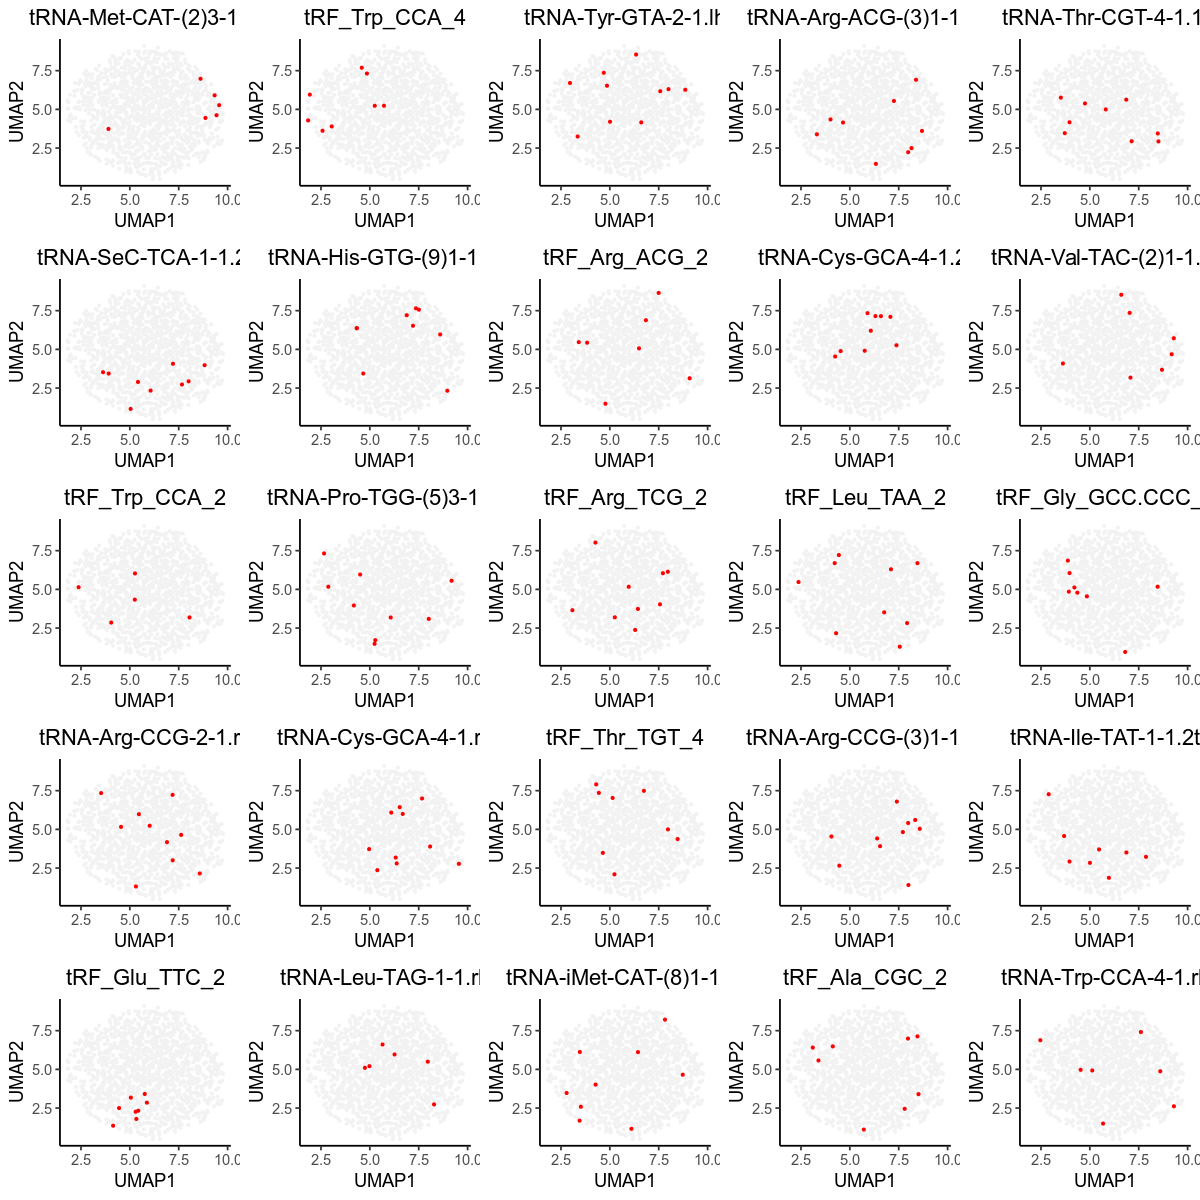

In [27]:
umap_plts[[17]][[1]]

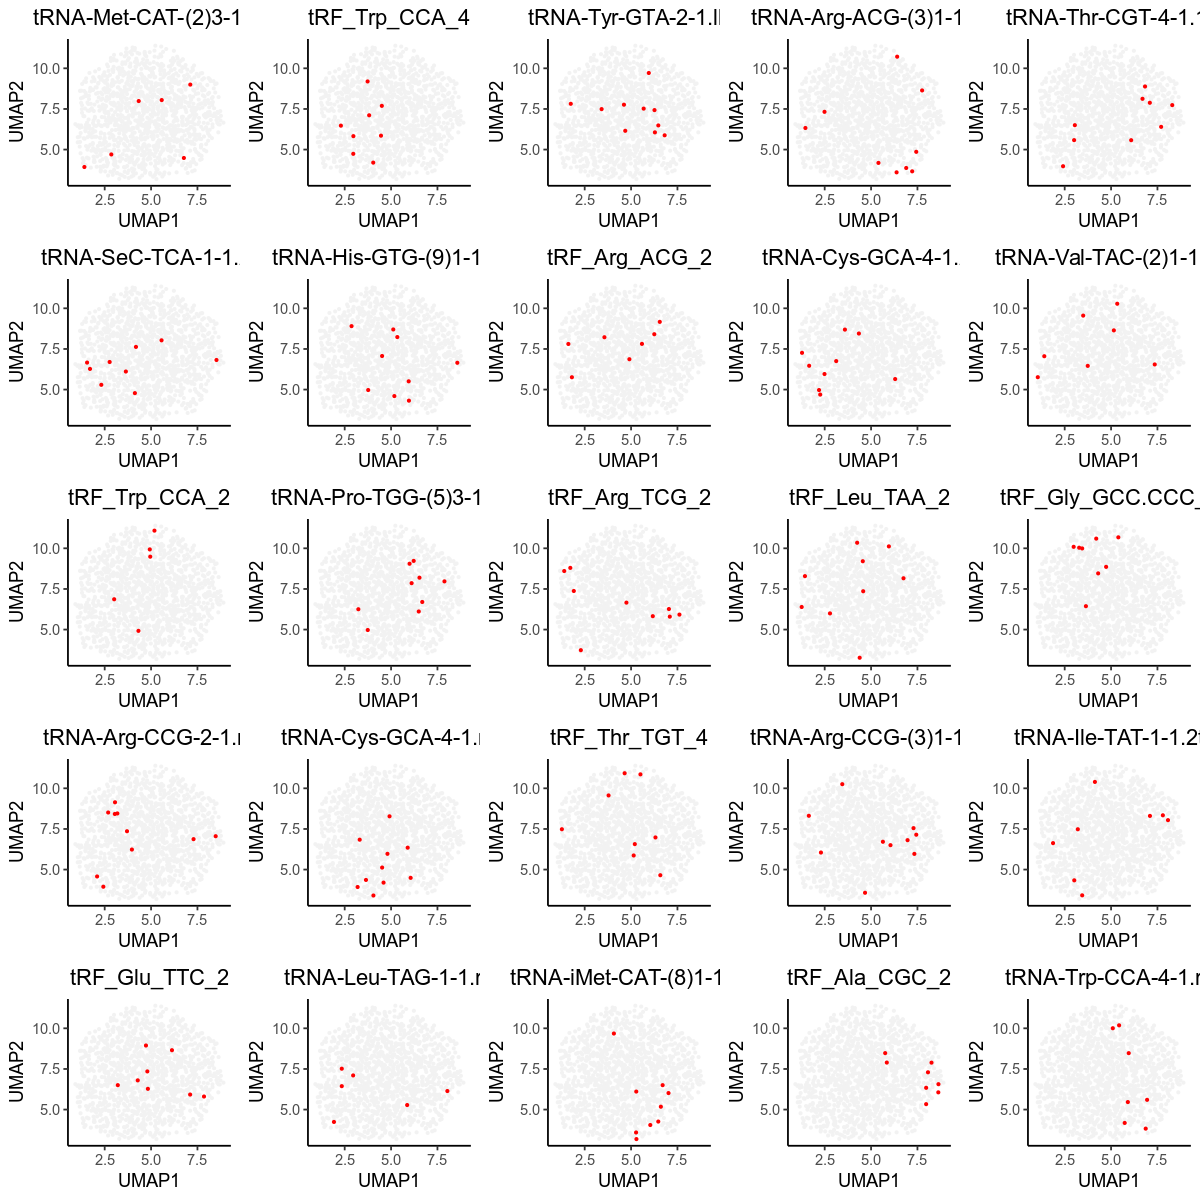

In [28]:
umap_plts[[18]][[1]]

## Loss analysis

In [63]:
loss_list = list()
selected_files = vector()
files = list.dirs(path, full.names = F, recursive = F)
total_loss_plots = list()
individual_loss_plots = list()
individual_loss_list = list()
for (i in 1:length(files)){
    files_with_info = file.info(list.files(paste0(file.path(path, files[i]), '/logs'), full.names = TRUE))
    selected_file = rownames(files_with_info[with(files_with_info, order(as.POSIXct(mtime), decreasing = TRUE)), ])[1]
    selected_files[i] = selected_file
    loss_list[[i]] = read.csv(selected_file, sep ='\t')
    colnames(loss_list[[i]])[2] <- 'Total_Loss'
    loss_list[[i]]$Recon_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Recon_Loss, " "), "[[", 1))))
    loss_list[[i]]$KLD_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$KLD_Loss, " "), "[[", 1))))
    loss_list[[i]]$Classification_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Classification_Loss, " "), "[[", 1))))
    loss_list[[i]]$Triplet_Loss <- as.numeric(gsub(',', '', gsub('tensor\\(', '', sapply(strsplit(loss_list[[i]]$Triplet_Loss, " "), "[[", 1))))
    loss_list[[i]][,3:6] <- apply(loss_list[[i]][,3:6], 2, as.numeric)
    loss_list[[i]]$Recon_Loss <- loss_list[[i]]$Recon_Loss/max(loss_list[[i]]$Recon_Loss)
    loss_list[[i]]$KLD_Loss <- loss_list[[i]]$KLD_Loss/max(loss_list[[i]]$KLD_Loss)
    loss_list[[i]]$Classification_Loss <- loss_list[[i]]$Classification_Loss/max(loss_list[[i]]$Classification_Loss)
    loss_list[[i]]$Triplet_Loss <- loss_list[[i]]$Triplet_Loss/max(loss_list[[i]]$Triplet_Loss)
    individual_loss_list[[i]] <- pivot_longer(loss_list[[i]], cols = 3:6, names_to = 'Loss_type', values_to = 'Loss')
    total_loss_plots[[i]] <- ggplot(loss_list[[i]], aes(Epoch, Total_Loss)) + geom_path() + theme_classic() + ggtitle(files[i])
    individual_loss_plots[[i]] <- ggplot(individual_loss_list[[i]], aes(Epoch, Loss, color = Loss_type)) + geom_path() + theme_classic() + ggtitle(files[i])
}

selected_files

[1] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T1/logs/training.log.2024-04-09_14001051.677014"                   
 [2] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T100000/logs/training.log.2024-04-09_14017035.991437"              
 [3] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T10000000000/logs/training.log.2024-04-09_14017032.162167"         
 [4] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T1000000000000000/logs/training.log.2024-04-09_14017035.069200"    
 [5] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T1e-05/logs/training.log.2024-04-09_14017025.374921"               
 [6] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T1e-10/logs/training.log.2024-04-09_14017037.139882"               
 [7] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R1_K1_C1_T1e-15/logs/training.log.2024-04-09_14017042.197977"               
 [8] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T1/logs/training.log.2024-04-09_14001033.639170"               
 [9] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T100000/logs/training.log.2024-04-09_14007007.055099"          
[10] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T10000000000/logs/training.log.2024-04-09_14017040.106215"     
[11] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T1000000000000000/logs/training.log.2024-04-09_14017043.655574"
[12] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T1e-05/logs/training.log.2024-04-09_14001030.849424"           
[13] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T1e-10/logs/training.log.2024-04-09_14017025.803711"           
[14] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1_T1e-15/logs/training.log.2024-04-09_14017038.408135"           
[15] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C100000_T1/logs/training.log.2024-04-09_14008048.632076"          
[16] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1_C1e-05_T1/logs/training.log.2024-04-09_14001023.935528"           
[17] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K100000_C1_T1/logs/training.log.2024-04-09_14001045.563233"          
[18] "/home/ssobti/projects/mir_tud/output_data/mave_output/mave_trblsht/tRF/parameter_optimization/R10000_K1e-05_C1_T1/logs/training.log.2024-04-09_14001043.344654"

## Loss graphs

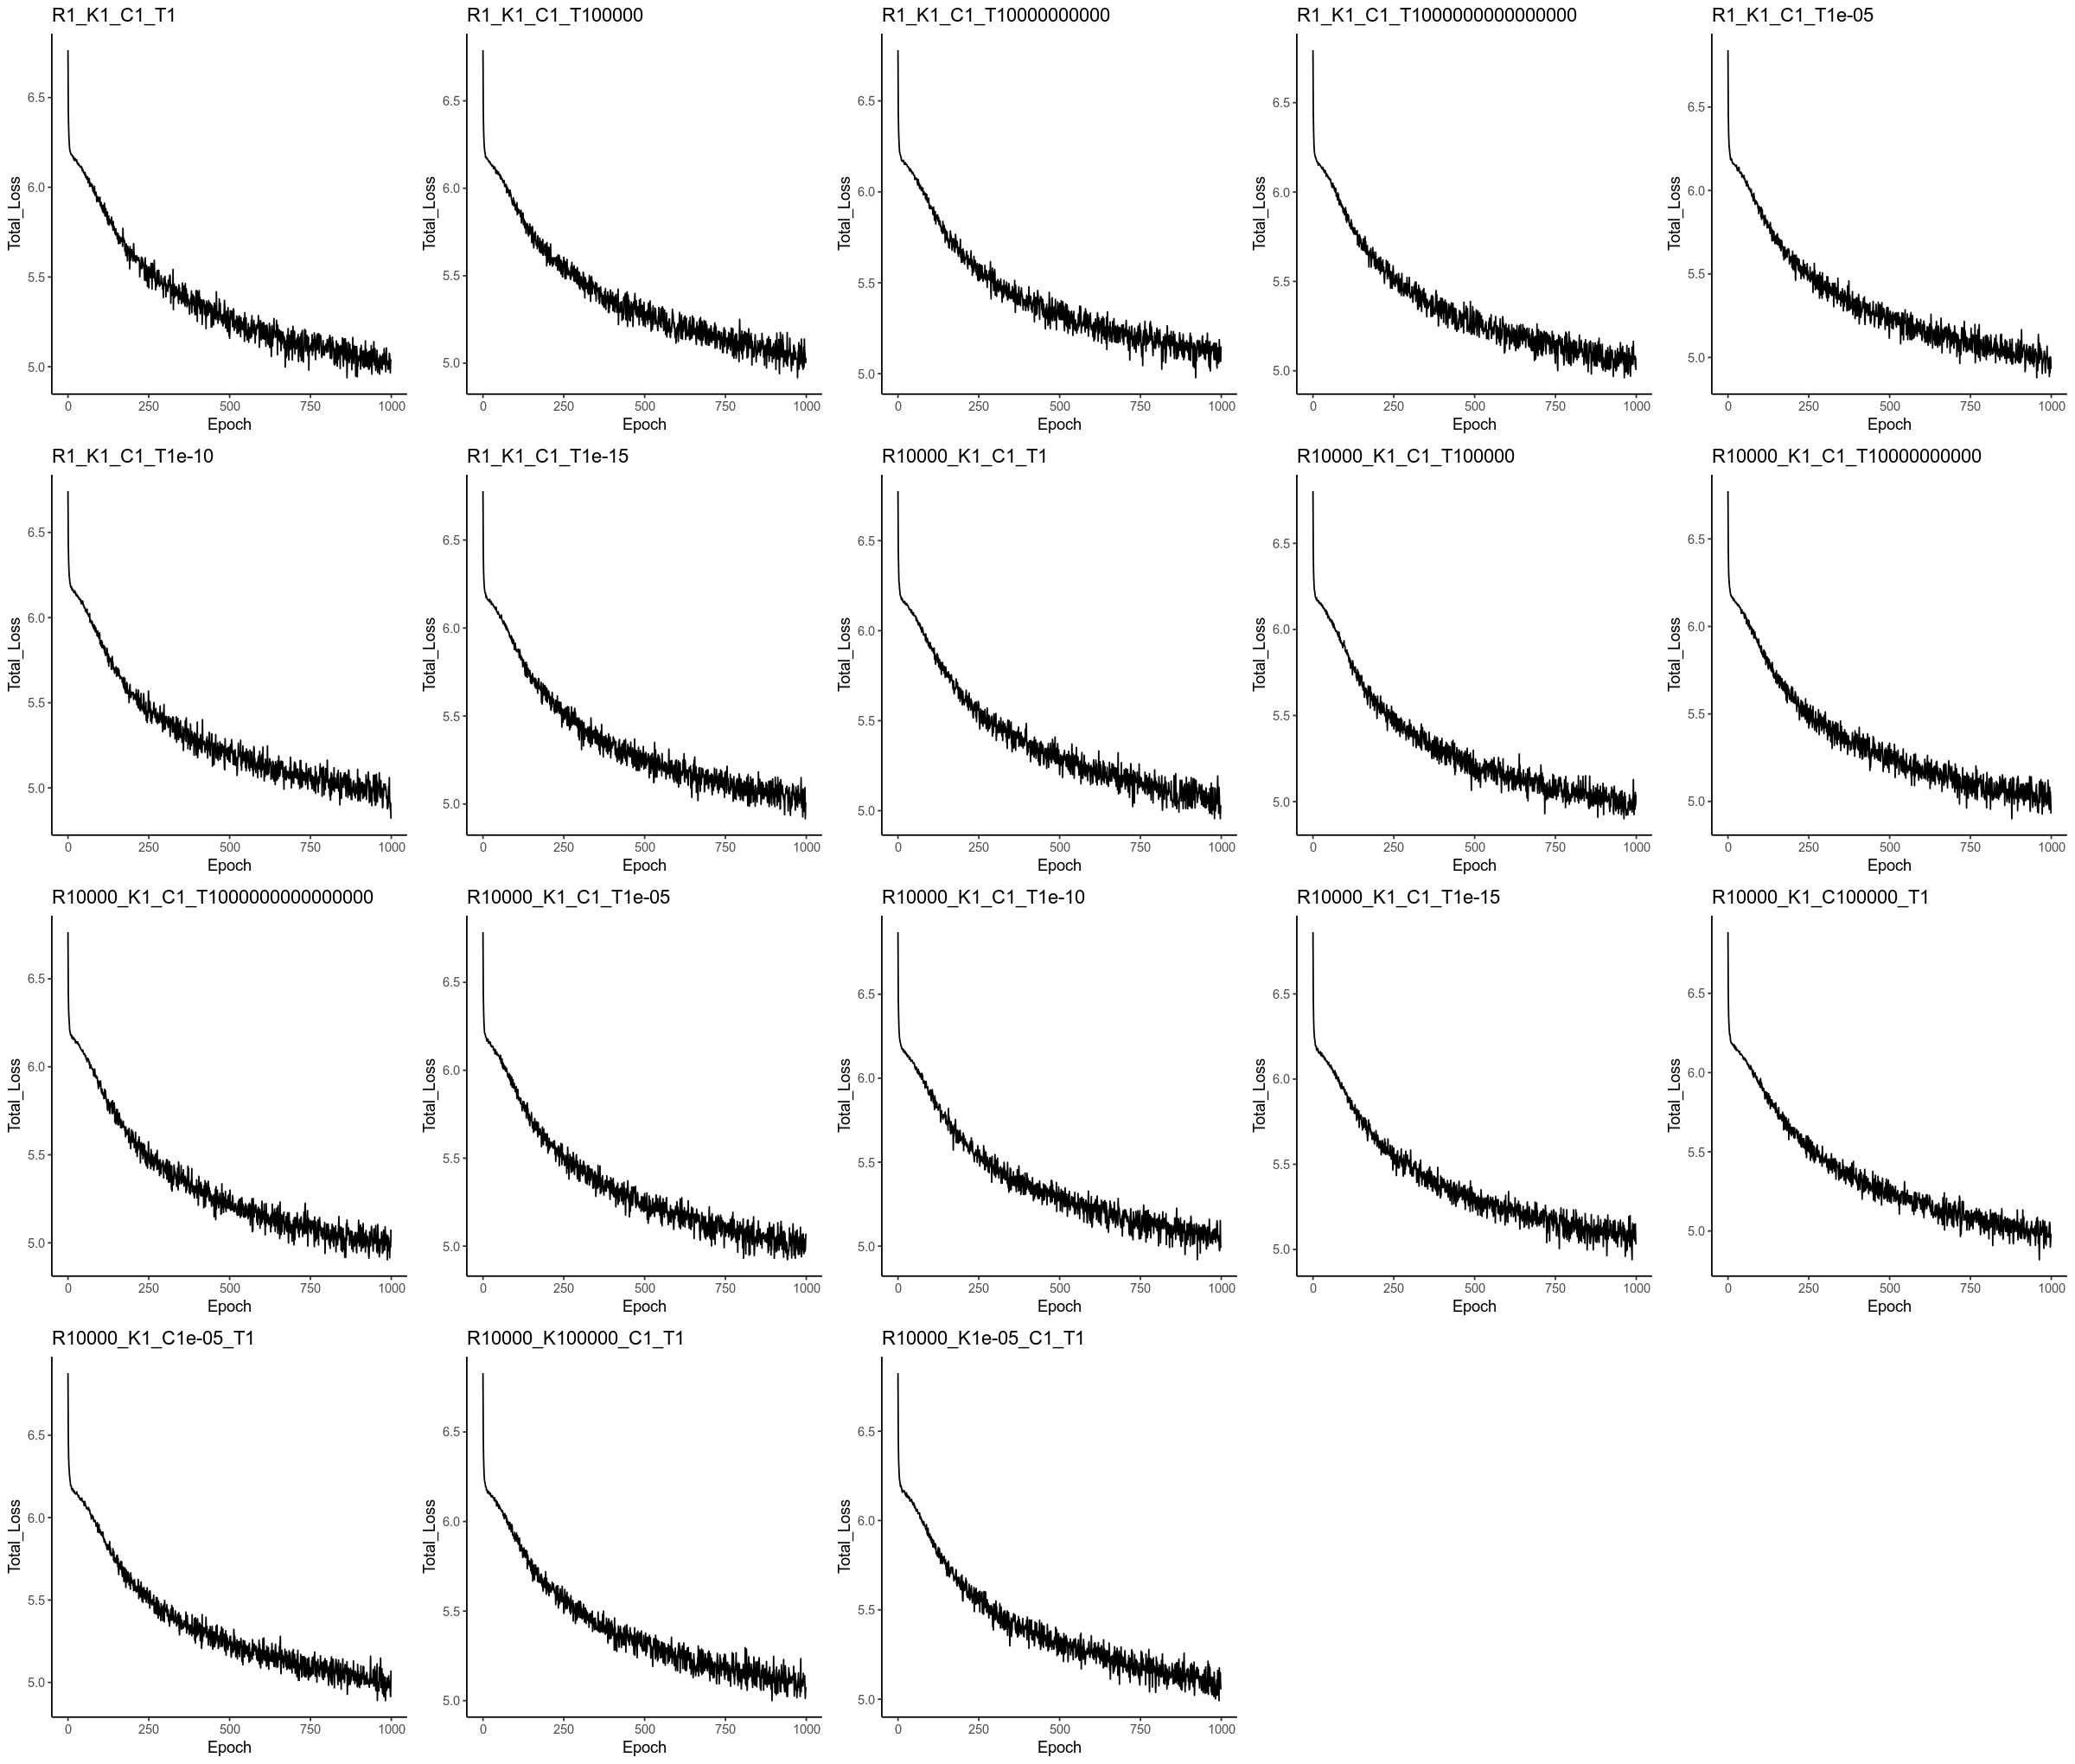

In [59]:
options(repr.plot.width=20, repr.plot.height=17)
ggpubr::ggarrange(plotlist = total_loss_plots)

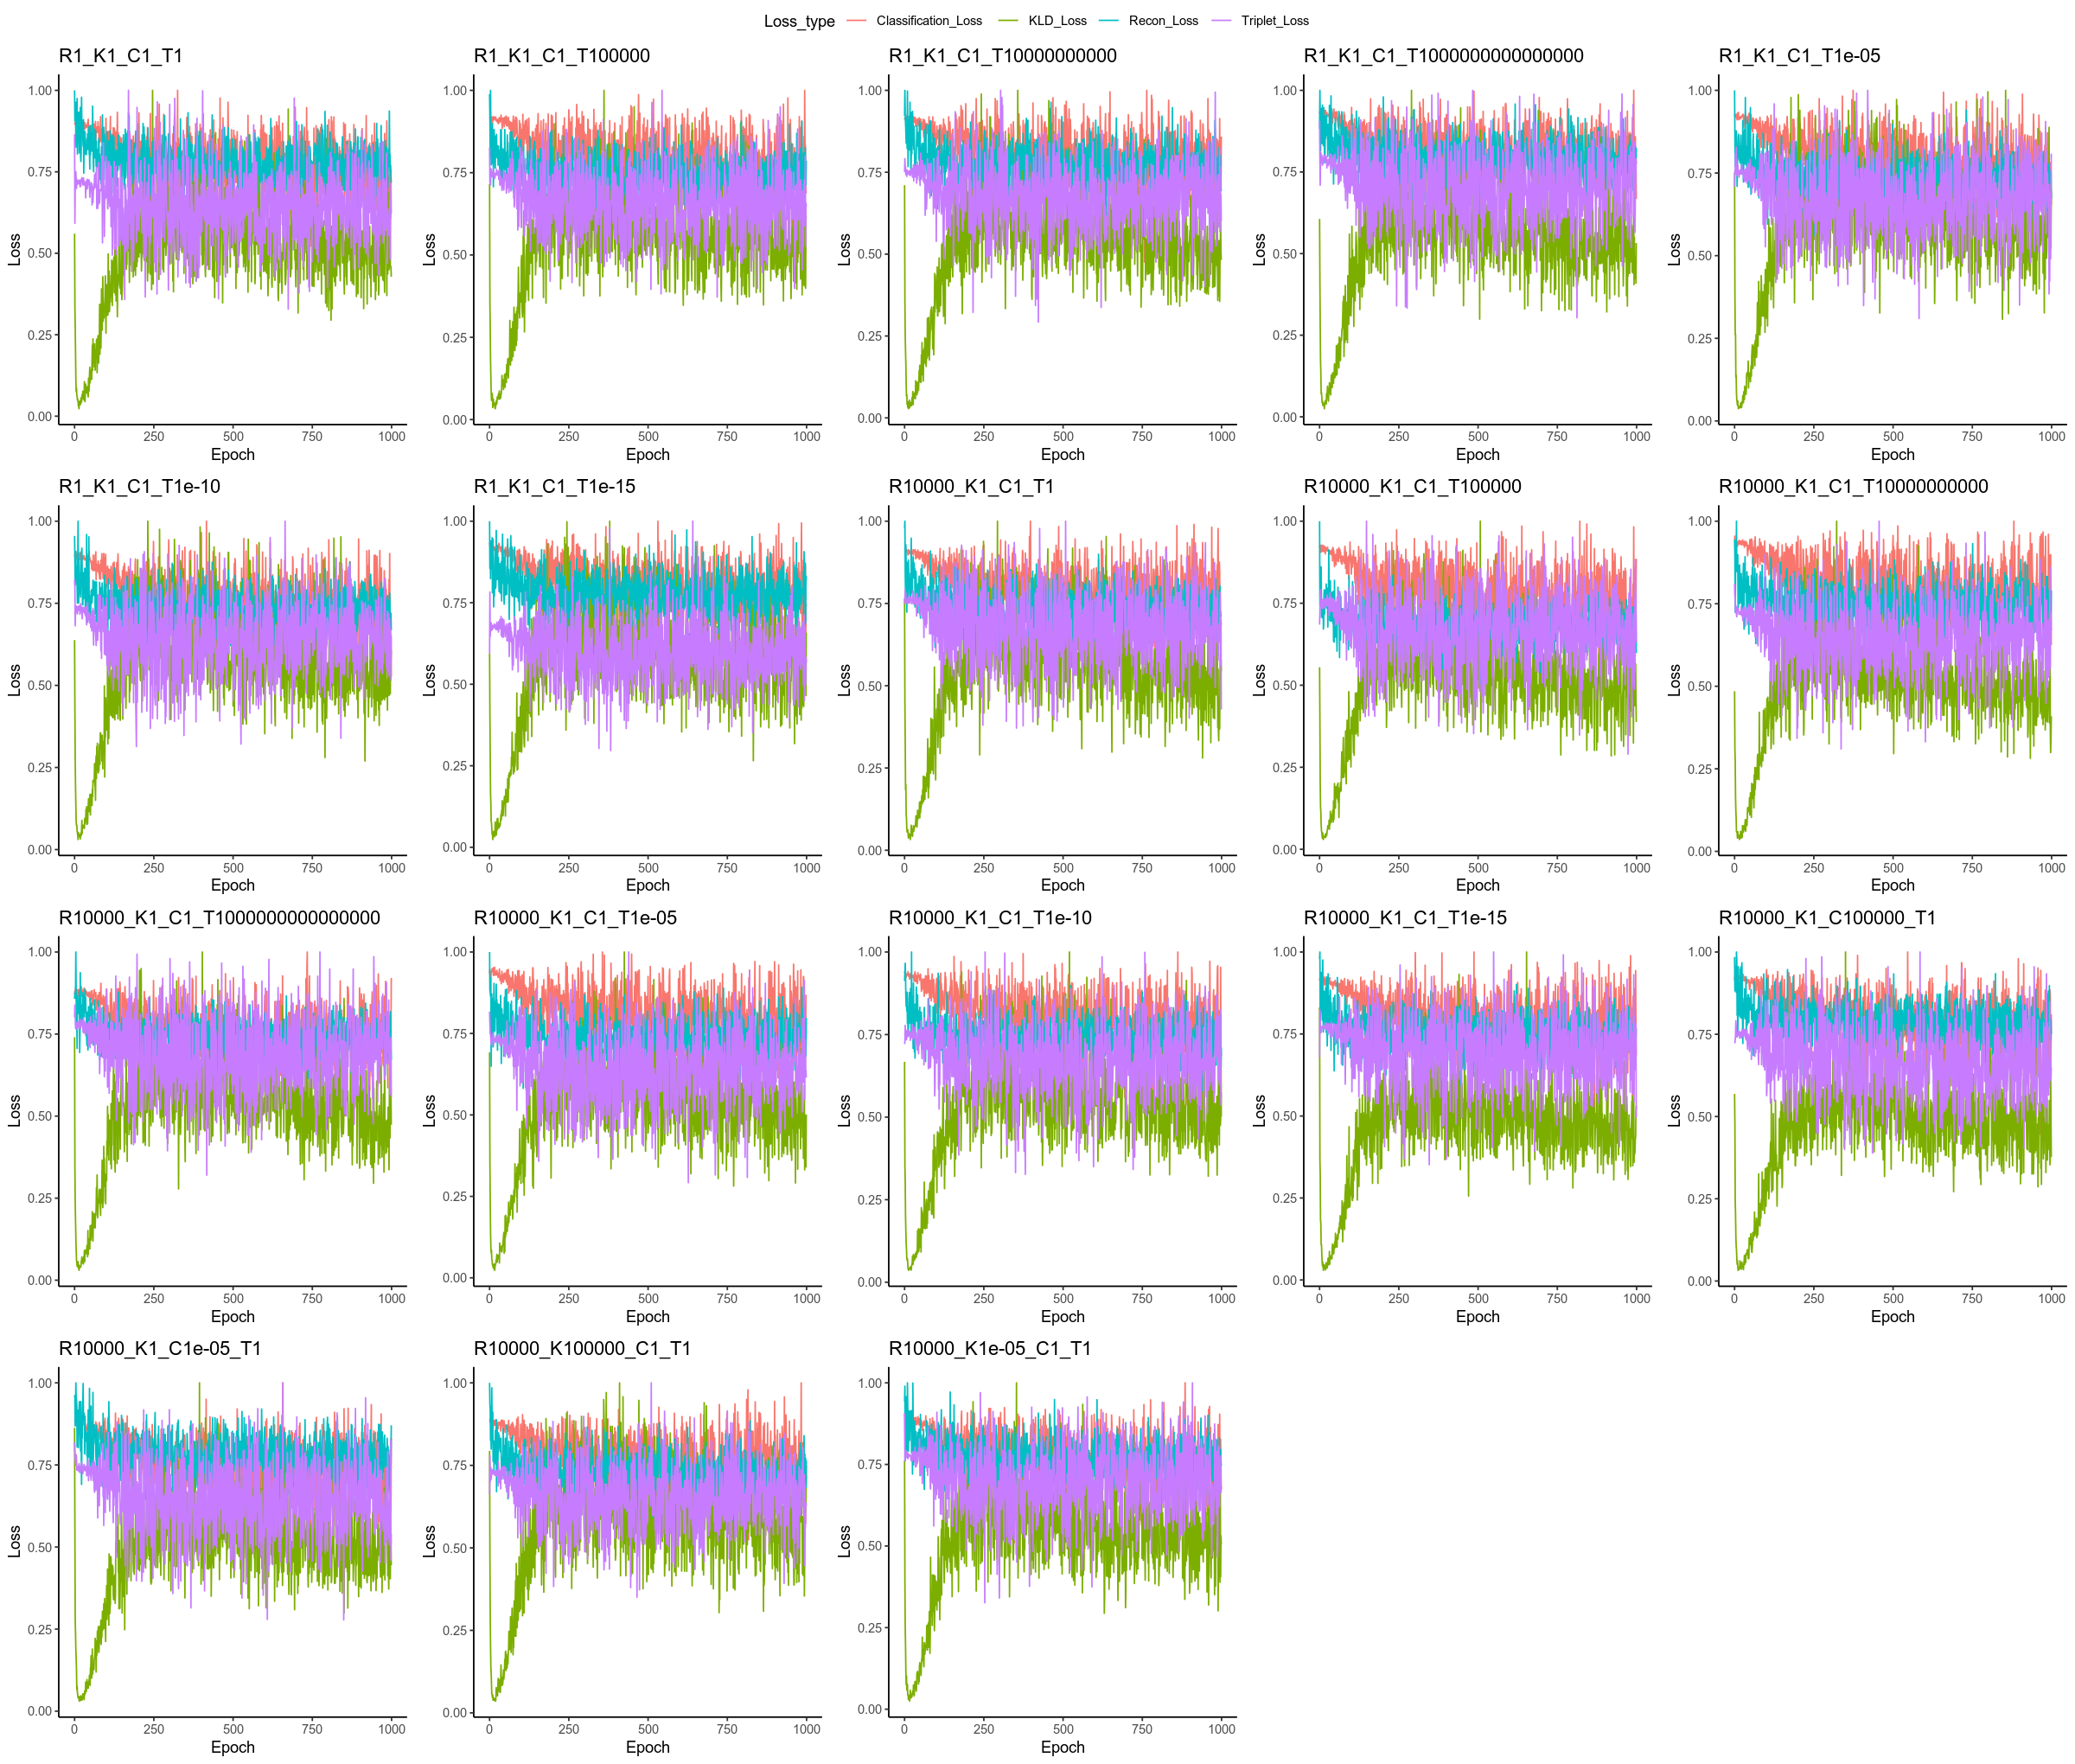

In [61]:
ggpubr::ggarrange(plotlist = individual_loss_plots, common.legend = TRUE)

In [ ]:
## clearly learning rate needs to be lowered -- also can increase batch size to all cells since <2k cells total